# Statistiques sur les poids d’attention avec RoBERTa

In [1]:
import pandas as pnd
from scipy import stats
from IPython.display import display
import matplotlib.pyplot as plt
import json
import tqdm

Allons chercher nos dataframes calculés sur chimichurri

In [2]:
DF_att = pnd.read_feather("./dataframe_attention.fth")
DF_att["relation"].fillna("<no_rel>", inplace=True)
DF_QK = pnd.read_feather("./dataframe_QscalK.fth")
DF_QK["relation"].fillna("<no_rel>", inplace=True)

DF_att = DF_att.iloc[:, :5+144]
DF_att.rename(columns = (lambda x: x[:-3] if (x.endswith("_SC") or x.endswith("_TT")) else x), inplace=True)
DF_QK = DF_QK.iloc[:, :5+144]
DF_QK.rename(columns = (lambda x: x[:-3] if (x.endswith("_SC") or x.endswith("_TT")) else x), inplace=True)
print(len(DF_att.columns))

149


Affichons la liste des colonnes

In [3]:
for C1, C2 in zip(DF_att.columns, DF_QK.columns):
    assert C1 == C2
    print(C1)

source_transfo
source_AMR
target_transfo
target_AMR
relation
att_L0_H0
att_L0_H1
att_L0_H2
att_L0_H3
att_L0_H4
att_L0_H5
att_L0_H6
att_L0_H7
att_L0_H8
att_L0_H9
att_L0_H10
att_L0_H11
att_L1_H0
att_L1_H1
att_L1_H2
att_L1_H3
att_L1_H4
att_L1_H5
att_L1_H6
att_L1_H7
att_L1_H8
att_L1_H9
att_L1_H10
att_L1_H11
att_L2_H0
att_L2_H1
att_L2_H2
att_L2_H3
att_L2_H4
att_L2_H5
att_L2_H6
att_L2_H7
att_L2_H8
att_L2_H9
att_L2_H10
att_L2_H11
att_L3_H0
att_L3_H1
att_L3_H2
att_L3_H3
att_L3_H4
att_L3_H5
att_L3_H6
att_L3_H7
att_L3_H8
att_L3_H9
att_L3_H10
att_L3_H11
att_L4_H0
att_L4_H1
att_L4_H2
att_L4_H3
att_L4_H4
att_L4_H5
att_L4_H6
att_L4_H7
att_L4_H8
att_L4_H9
att_L4_H10
att_L4_H11
att_L5_H0
att_L5_H1
att_L5_H2
att_L5_H3
att_L5_H4
att_L5_H5
att_L5_H6
att_L5_H7
att_L5_H8
att_L5_H9
att_L5_H10
att_L5_H11
att_L6_H0
att_L6_H1
att_L6_H2
att_L6_H3
att_L6_H4
att_L6_H5
att_L6_H6
att_L6_H7
att_L6_H8
att_L6_H9
att_L6_H10
att_L6_H11
att_L7_H0
att_L7_H1
att_L7_H2
att_L7_H3
att_L7_H4
att_L7_H5
att_L7_H6
att_L7_H7
att_L

Établissons la liste des relations

In [4]:
relations_att = DF_att.groupby(DF_att["relation"]).size()
relations_att = relations_att.sort_values(ascending=False)

relations_QK = DF_QK.groupby(DF_att["relation"]).size()
relations_QK = relations_QK.sort_values(ascending=False)
display(relations_att)
display(relations_QK)

#Vérifier qu’on obtient bien le même résultat
#à partir des attentions ou à partir des produits scalaires.
print((relations_QK == relations_att).all())

relation
:ARG1           122844
<no_rel>         63325
:ARG0            61168
:mod             43282
:ARG2            29372
                 ...  
:op17                1
:prep-out-of         1
:op18                1
:snt11               1
:scale               1
Length: 97, dtype: int64

relation
:ARG1           122844
<no_rel>         63325
:ARG0            61168
:mod             43282
:ARG2            29372
                 ...  
:op17                1
:prep-out-of         1
:op18                1
:snt11               1
:scale               1
Length: 97, dtype: int64

True


In [5]:
print(relations_QK.head(15))

relation
:ARG1        122844
<no_rel>      63325
:ARG0         61168
:mod          43282
:ARG2         29372
:op1          20063
:op2          17695
:time         11051
:polarity     10098
:location      5638
:quant         5479
:poss          4284
:manner        4257
:degree        3534
:ARG3          3034
dtype: int64


## Fonction pour extraire une tête d’attention et une relation

In [6]:
groups = {
    "att" : DF_att.groupby(DF_att["relation"]),
    "QK"  : DF_QK.groupby(DF_QK["relation"])
}
colonnes = DF_att.columns
relations = DF_att["relation"].unique()

def extract_head_rel(attQK, head, relation):
    assert attQK in groups
    if not head.startswith("att_"):
        head = "att_"+head
    assert head in colonnes
    columns = [c for c in colonnes[:4]] + [head]
    dfout = groups[attQK].get_group(relation)[columns].copy()
    return dfout

In [7]:
print(len(groups["QK"].get_group(":op17")))
print(colonnes)

1
Index(['source_transfo', 'source_AMR', 'target_transfo', 'target_AMR',
       'relation', 'att_L0_H0', 'att_L0_H1', 'att_L0_H2', 'att_L0_H3',
       'att_L0_H4',
       ...
       'att_L11_H2', 'att_L11_H3', 'att_L11_H4', 'att_L11_H5', 'att_L11_H6',
       'att_L11_H7', 'att_L11_H8', 'att_L11_H9', 'att_L11_H10', 'att_L11_H11'],
      dtype='object', length=149)


In [22]:
display(extract_head_rel("QK", "L0_H0", ":ARG2").head())

source_transfo    source_AMR target_transfo   target_AMR  att_L0_H0
4         ability    capable-01     innovation  innovate-01   1.205351
23         amount     amount-01        maximum      at-most   6.786044
31      encourage  encourage-01            and          and   1.953854
60        However   contrast-01           with          and   1.615836
66             of    include-91      buildings     building   3.930227

## Test de normalité des têtes d’attention

In [23]:
def test_normality(attQK):
    normales = []
    non_normales = dict()
    grps = groups[attQK]
    all_heads = ["att_L%d_H%d"%(L,H) for L in range(12) for H in range(12)]
    
    with tqdm.tqdm(total=len(all_heads)*len(relations)) as pbar:
        for rel in relations:
            dataf = grps.get_group(rel)
            if len(dataf) < 500:
                _ = pbar.update(len(all_heads))
            else:
                for head in all_heads:
                    test = stats.shapiro(dataf[head])
                    if test.pvalue > 0.05:
                        #Si H0 n’est pas rejetée (qui prétend que les données sont normalement distribuées)
                        normales.append((rel, head))
                    else:
                        non_normales[(rel, head)] = test.pvalue
                    _ = pbar.update(1)
    
    return normales, non_normales
                

In [24]:
norm_QK, non_norm_QK = test_normality("QK")
norm_att, non_norm_att = test_normality("att")

  0%|          | 0/13968 [00:00<?, ?it/s]

/home/frederic/miniconda3/envs/sklearn/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
  0%|          | 0/13968 [00:00<?, ?it/s]/home/frederic/miniconda3/envs/sklearn/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
100%|██████████| 13968/13968 [00:03<00:00, 3795.38it/s]


In [26]:
print(len(norm_QK), len(non_norm_QK))
print(len(norm_att), len(non_norm_att))

377 3943
0 4320


On constate que la plupart des données ne sont pas normalement distribuées, même pour les produits scalaires. (Pour les poids d’attention, on s’en doutait.)

In [26]:
if any(rel == "<no_rel>" for rel, H in norm_QK):
    print("Il y a des paires sans relation dont le produit scalaire est normalement distribué")
else:
    print("Il n’y a pas de paires sans relation dont le produit scalaire soit normalement distribué.")

Il n’y a pas de paires sans relation dont le produit scalaire soit normalement distribué.


In [29]:
print(all(("<no_rel>", "att_L%d_H%d"%(L,H) )in non_norm_QK for L in range(12) for H in range(12)))

True


## Traçons les densités estimées par la méthode KDE

In [65]:
def plot_densities(attQK, rel, **kwargs):
    DataF = groups[attQK].get_group(rel)
    #fig, axes = plt.subplots(
    #    nrows=4,ncols=4, sharex=True, sharey=True, figsize=[200,200]
    #)
    fig, axes = plt.subplots(
        nrows=12,ncols=12, figsize=[72,72]
    )
    
    for L,H in tqdm.tqdm([(i,j) for i in range(12) for j in range(12)]):
        head = "att_L%d_H%d"%(L,H)
        DataF[head].plot.kde(ax = axes[L,H], legend = head, **kwargs)
        
    plt.show()
            

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [04:19<00:00,  1.80s/it]


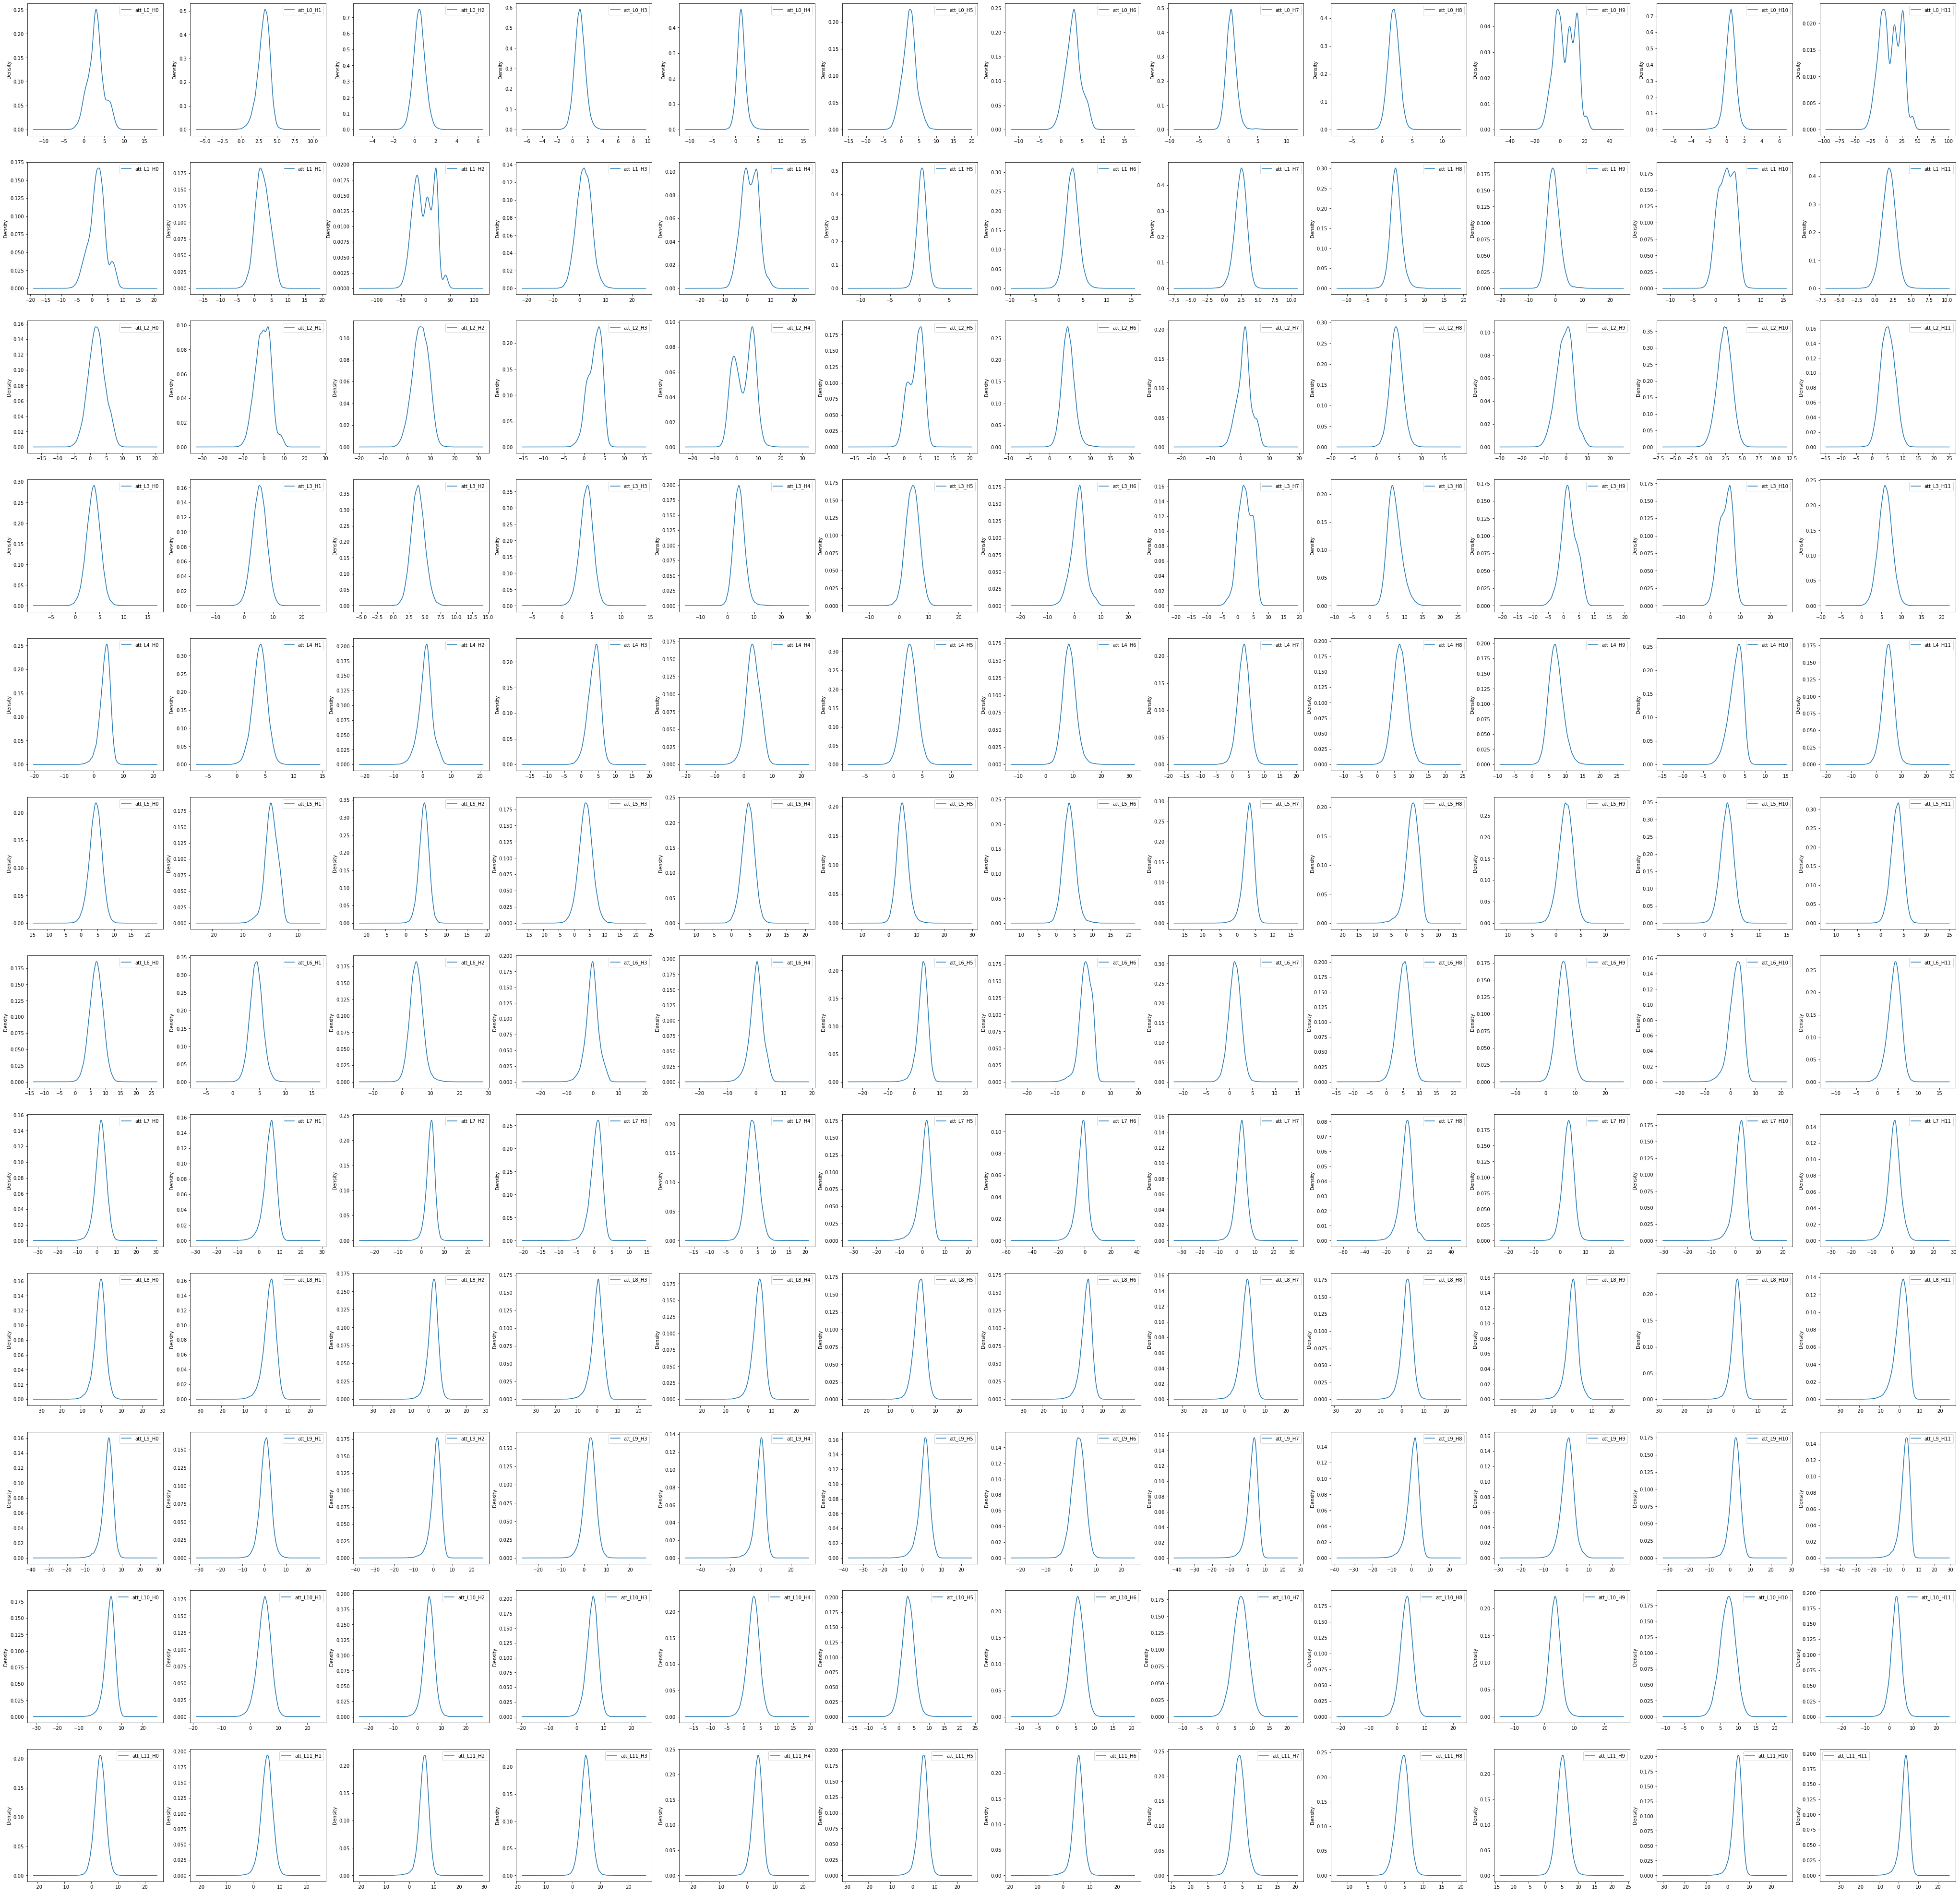

In [63]:
plot_densities("QK", "<no_rel>")

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [05:13<00:00,  2.17s/it]


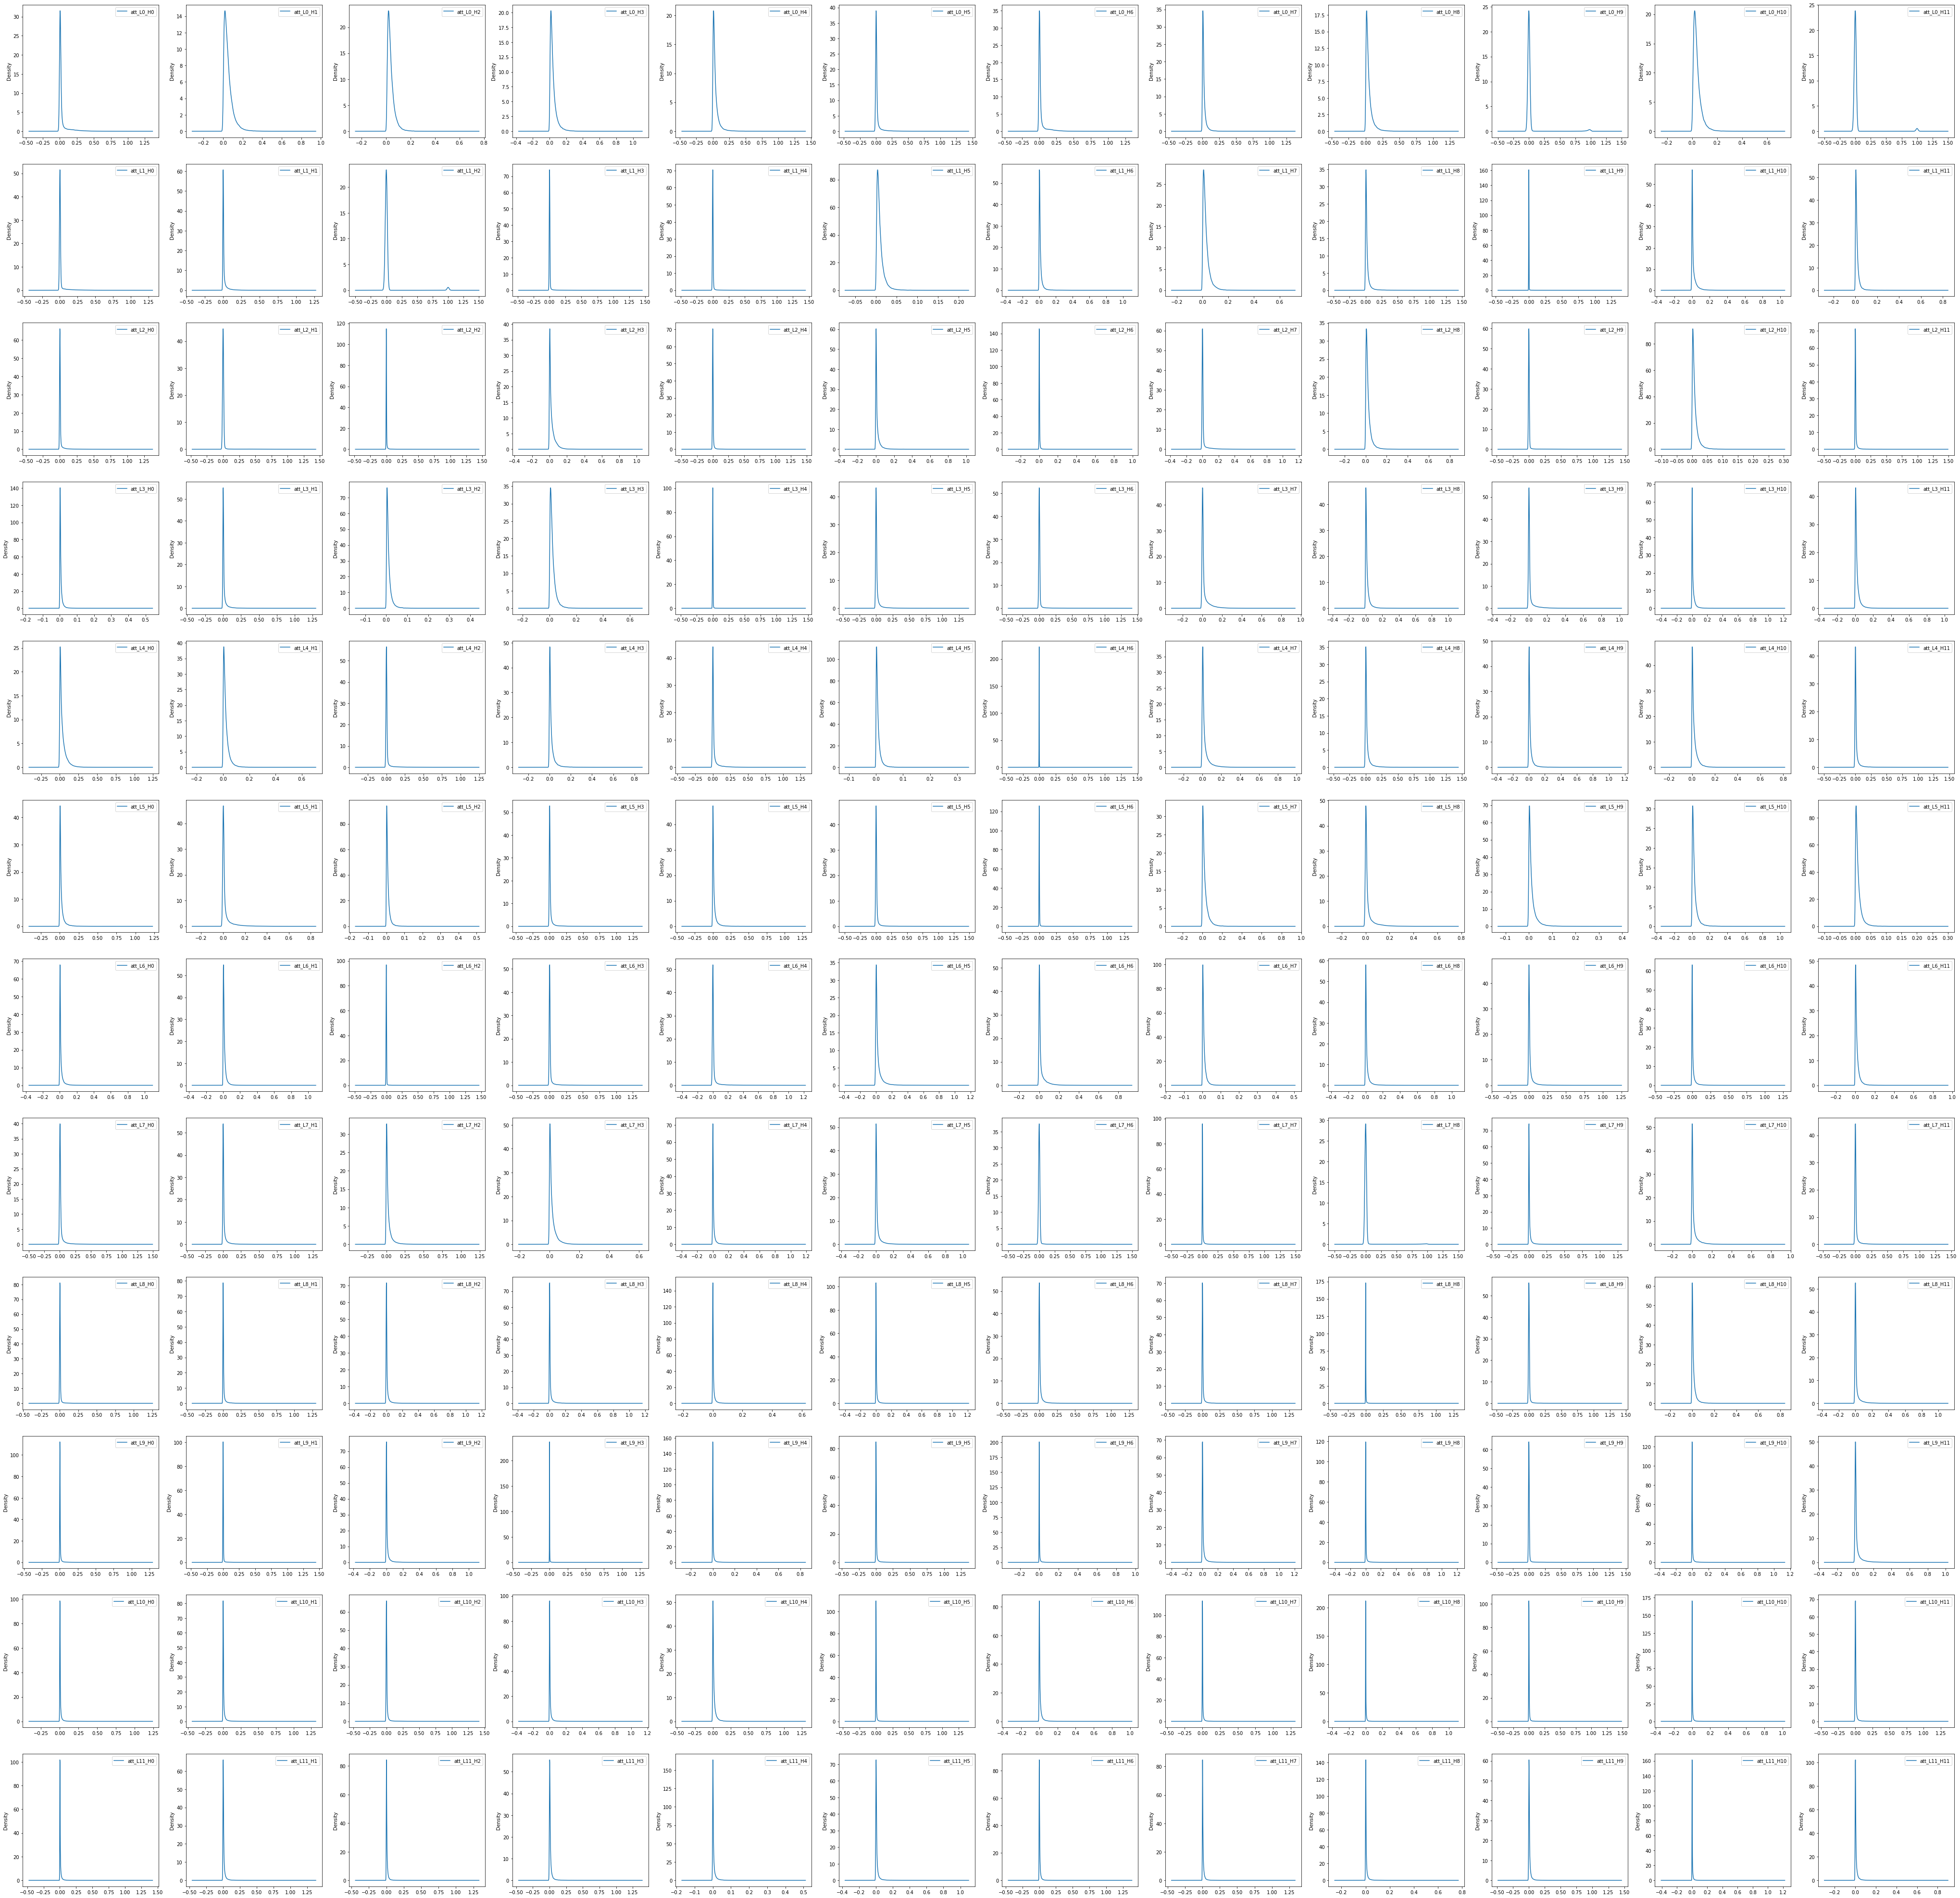

In [66]:
plot_densities("att", "<no_rel>")

# Analyse en Composantes Principales

In [106]:
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import joblib

1.3.0


In [107]:
class ACP:
    def __init__(self):
        self.sc = StandardScaler()
        self.acp = PCA()
        
    def fit(self, dataf):
        self.dataf = dataf
        self.Z = self.sc.fit_transform(dataf[colonnes[5:]])
        #self.Z = dataf[colonnes[5:]].to_numpy()
        self.nobs = self.Z.shape[0]
        self.coord = self.acp.fit_transform(self.Z)
        self.ncomp = self.acp.n_components_
        self.eigval = ((self.nobs-1)/self.nobs)*self.acp.explained_variance_
        self.evr = self.acp.explained_variance_ratio_
        self.mini = np.min(self.Z)
        self.maxi = np.max(self.Z)
        
    def scree_plot(self, p):
        plt.plot(np.arange(1, p+1), self.eigval[:p])
        plt.title("Scree plot")
        plt.ylabel("Valeurs propres")
        plt.xlabel("Numéro de VP")
        plt.show()
    
    def cumul_variance(self, p):
        cumul = np.cumsum(self.evr)[:p]
        print(cumul)
        plt.plot(np.arange(1,p+1), cumul)
        plt.title("Variance expliquée")
        plt.ylabel("Pourcentage de la variance totale")
        plt.xlabel("Numéro de VP")
        plt.show()
        
    def plot_individuals(self, relations, kde=False, contour=True, scatter=False):
        if type(relations) is list:
            assert len(relations) == 2 and all(type(X) is str for X in relations)
            #kde=False
            #contour=True
            #scatter=False
        else:
            relations = [relations]
            
        coord = self.coord[:, 0:4]  # On retient quatre composantes principales
        
        minima = np.min(coord, axis=0).tolist()
        maxima = np.max(coord, axis=0).tolist()
        
        fig, axes = plt.subplots(
            nrows=3,ncols=2, figsize=[16,24]
        )
        dic_axes = {(0,1):axes[0,0], (0,2):axes[1,0], (0,3):axes[2,0],
                    (1,2):axes[0,1], (1,3):axes[1,1], (2,3):axes[2,1]}
        
        couleurs = ["red", "green"]
        
        for relation, couleur in zip(relations, couleurs):
        
            crd_filtr = coord[self.dataf["relation"]==relation, :]
            print(crd_filtr.shape)

            # Il y a trop d’individus. On va calculer une KDE et afficher l’intensité
            # en chaque point à la place.

            for (PC1, PC2), AX in dic_axes.items():
                xmin, ymin = minima[PC1], minima[PC2]
                xmax, ymax = maxima[PC1], maxima[PC2]
                print("PC%d : [%f , %f] PC%d : [%f , %f]"%(1+PC1, xmin, xmax, 1+PC2, ymin, ymax))

                xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
                positions = np.vstack([xx.ravel(), yy.ravel()])
                kernel = stats.gaussian_kde(crd_filtr[:, [PC1, PC2]].T)
                f = np.reshape(kernel(positions), xx.shape)
                AX.set_xlabel("PC%d"%(1+PC1))
                AX.set_ylabel("PC%d"%(1+PC2))
                AX.set_xlim([xmin, xmax])
                AX.set_ylim([ymin, ymax])

                if kde:
                    AX.imshow(np.rot90(f),
                            #cmap = plt.cm.gist_earth_r,
                            extent = [xmin, xmax, ymin, ymax])
                    #AX.imshow(np.rot90(f))


                if contour:
                    cset = AX.contour(xx, yy, f, colors=couleur, )
                    # Label plot
                    #axes.clabel(cset, inline=1, fontsize=10)

                if scatter:
                    AX.plot(crd_filtr[:,0], crd_filtr[:,1], 'k.', markersize=2)
                
                
            
        
        plt.show()

    def plot_univar(self, relations, PCn, nom_fich=None):
        if type(relations) is list:
            assert all(type(X) is str for X in relations)
        else:
            relations = [relations]
            
        coord = self.coord[:, PCn-1]  # On retient quatre composantes principales
        
        xmin = np.min(coord, axis=0).tolist()
        xmax = np.max(coord, axis=0).tolist()
        fig, axes = plt.subplots()
        
        for relation in relations:
            crd_filtr = coord[self.dataf["relation"]==relation]
            print(crd_filtr.shape)
            print("PC%d : [%f , %f]"%(PCn, xmin, xmax))
            kernel = stats.gaussian_kde(crd_filtr.T)
            Xx = np.mgrid[xmin:xmax:300j]
            f = kernel(Xx)
            axes.set_xlabel("PC%d"%PCn)
            #axes.set_xlim([xmin, xmax])
            axes.plot(Xx, f)
        axes.legend(tuple(relations))
        if nom_fich != None:
            plt.savefig(nom_fich)
        plt.show()

    def pour_plot(self, relations, PCn, nom_fich):
        if type(relations) is list:
            assert all(type(X) is str for X in relations)
        else:
            relations = [relations]
            
        coord = self.coord[:, PCn-1]  # On retient quatre composantes principales
        
        xmin = np.min(coord, axis=0).tolist()
        xmax = np.max(coord, axis=0).tolist()
        
        Ys = [np.mgrid[xmin:xmax:300j]]
        for relation in relations:
            crd_filtr = coord[self.dataf["relation"]==relation]
            print(crd_filtr.shape)
            print("PC%d : [%f , %f]"%(PCn, xmin, xmax))
            kernel = stats.gaussian_kde(crd_filtr.T)
            Ys.append(kernel(Ys[0]))
        Ys = np.vstack(Ys) 
        if nom_fich != None:
            joblib.dump(Ys, nom_fich)
        
        
    def cos2(self):
        #Contribution des individus dans l’inertie totale :
        self.di = np.sum(self.Z**2, axis=1)
        #cos² :
        self.cos2 = (self.coord**2)/di.reshape((-1,1)) # calcul qui tire parti de la distributivité.
        #print(np.sum(cos2, axis=1)[:15])
        
    def prepare_plot_variables(self):
        eigvect = self.acp.components_
        sqrt_eigval = np.sqrt(self.eigval)
        
        #corrélation des variables avec les axes :
        self.corvar = np.zeros((self.ncomp, self.ncomp))
        for k in range(self.ncomp):
            self.corvar[:,k] = eigvect[k,:] * sqrt_eigval[k]
            
        
    def plot_variables(self, comp1, comp2):
        couleurs = ["#a6cee3", "#1f78b4", "#b2df8a",
                    "#33a02c", "#fb9a99", "#e31a1c",
                    "#fdbf6f", "#ff7f00", "#cab2d6",
                    "#6a3d9a", "#ffff99", "#b15928"]
        #Tracé du cercle de corrélation
        fig, axes = plt.subplots(figsize=(15,15))
        axes.set_xlim(-1,1)
        axes.set_ylim(-1,1)
        
        #affichage des étiquettes mentionnant les têtes d’atention :
        for j in range(self.ncomp):
            nomcol = colonnes[5+j][4:] # nom de la colonne, amputé des 4 premières lettres ("att_")
            num_couche = int(nomcol[1:nomcol.index("_")])
            plt.annotate(nomcol,
                         (self.corvar[j,comp1], self.corvar[j,comp2]),
                         color = couleurs[num_couche])
        
        #ajout des axes
        plt.plot([-1,1], [0,0], color="silver", linestyle="-", linewidth=1)
        plt.plot([0,0], [-1,1], color="silver", linestyle="-", linewidth=1)
        
        #dessiner un cercle
        circulus = plt.Circle((0,0), 1, color="blue", fill=False)
        axes.add_artist(circulus)
        
        plt.show()
        
    def export_json(self, ncomp, fichier_out):
        liste = self.coord[:, 0:ncomp].tolist()
        liste = [L + [self.dataf.iloc[i]["relation"]] for i, L in enumerate(liste)]
                
        with open(fichier_out, "w", encoding="utf-8") as F:
            json.dump(liste, F)
        
        
    

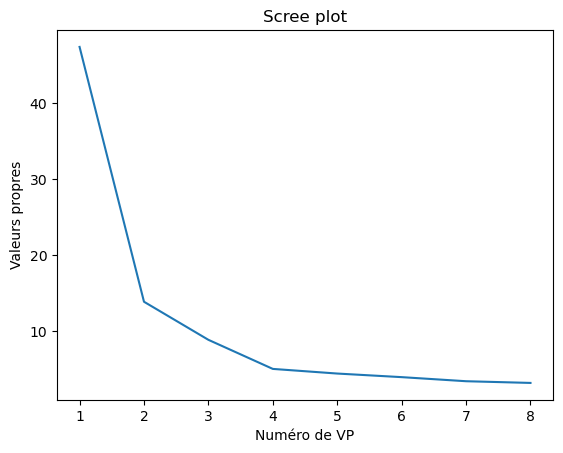

[0.32937829 0.42580843 0.48743011 0.52246213 0.5532546  0.58076199
 0.60453596 0.62675832]


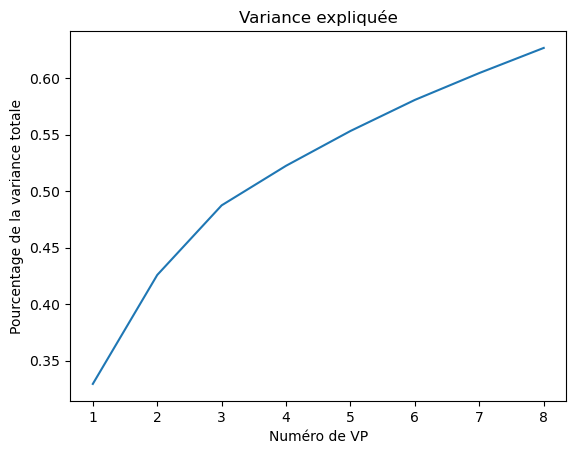

In [108]:
monACP = ACP()
monACP.fit(DF_QK)
monACP.scree_plot(8)
monACP.cumul_variance(8)

In [10]:
monACP.dataf.iloc[0]["att_L0_H0"]

2.652776

In [11]:
print(monACP.eigval[0:4])
print(monACP.coord.shape)
print(monACP.coord[0:3,0:3])

[47.43045994 13.88593582  8.87352036  5.04460907]
(429666, 144)
[[-2.173974  -4.3078713  3.42822  ]
 [-6.5182905  1.3933265  3.5711114]
 [-2.4986522  5.3955154  4.266288 ]]


In [34]:
monACP.export_json(4, "./ACP_QK.json")

In [109]:
monACP.prepare_plot_variables()

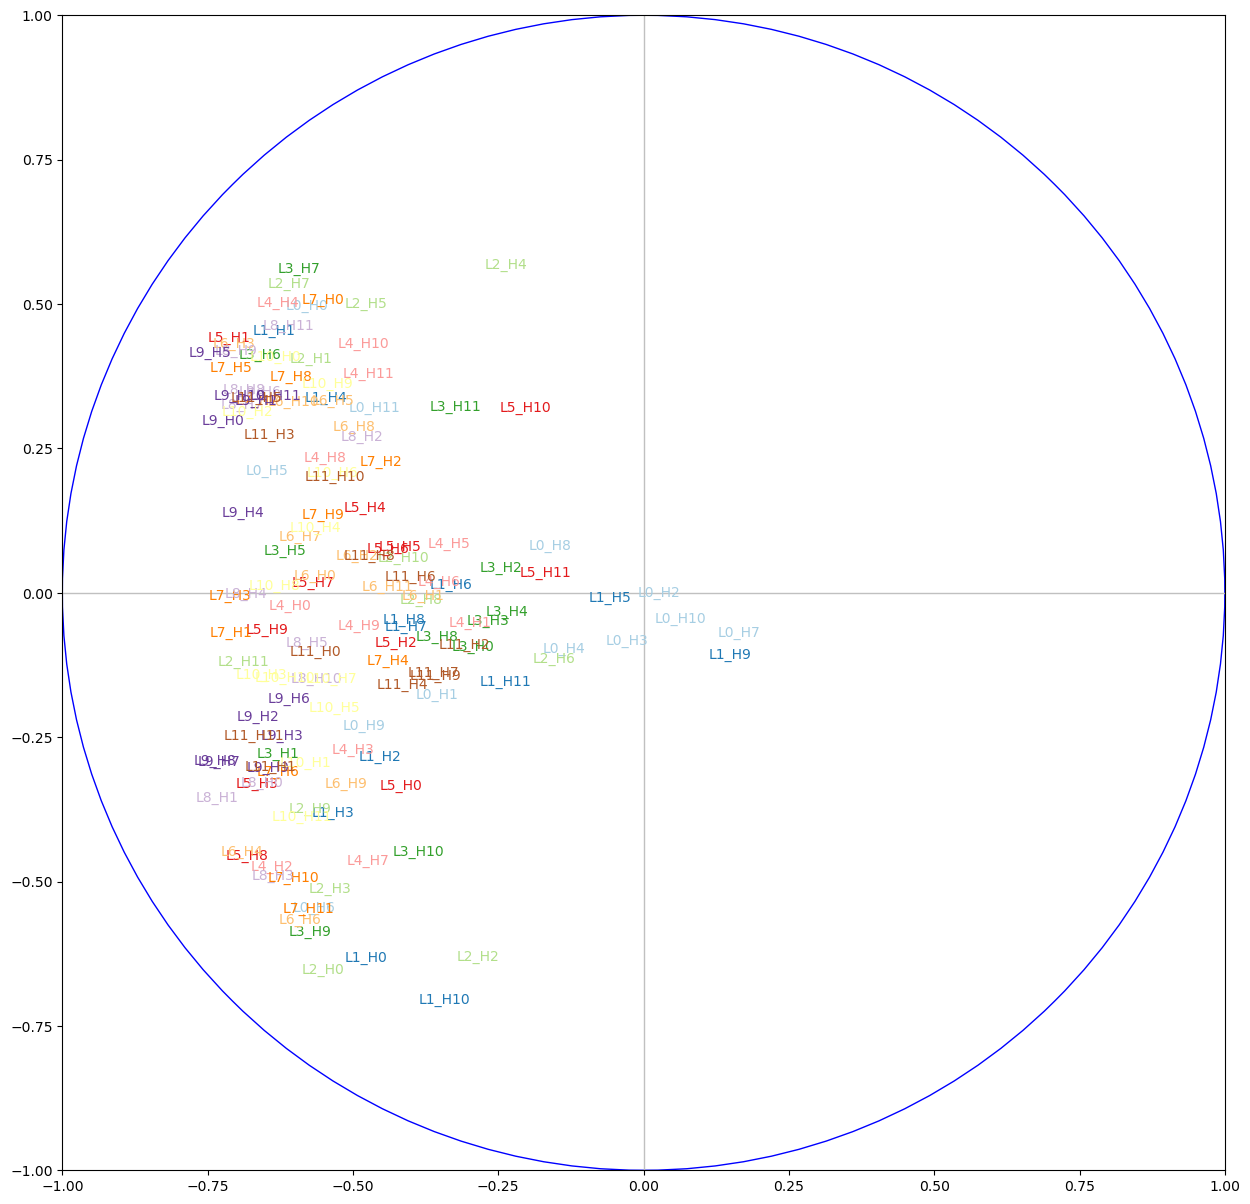

In [110]:
monACP.plot_variables(0,1)

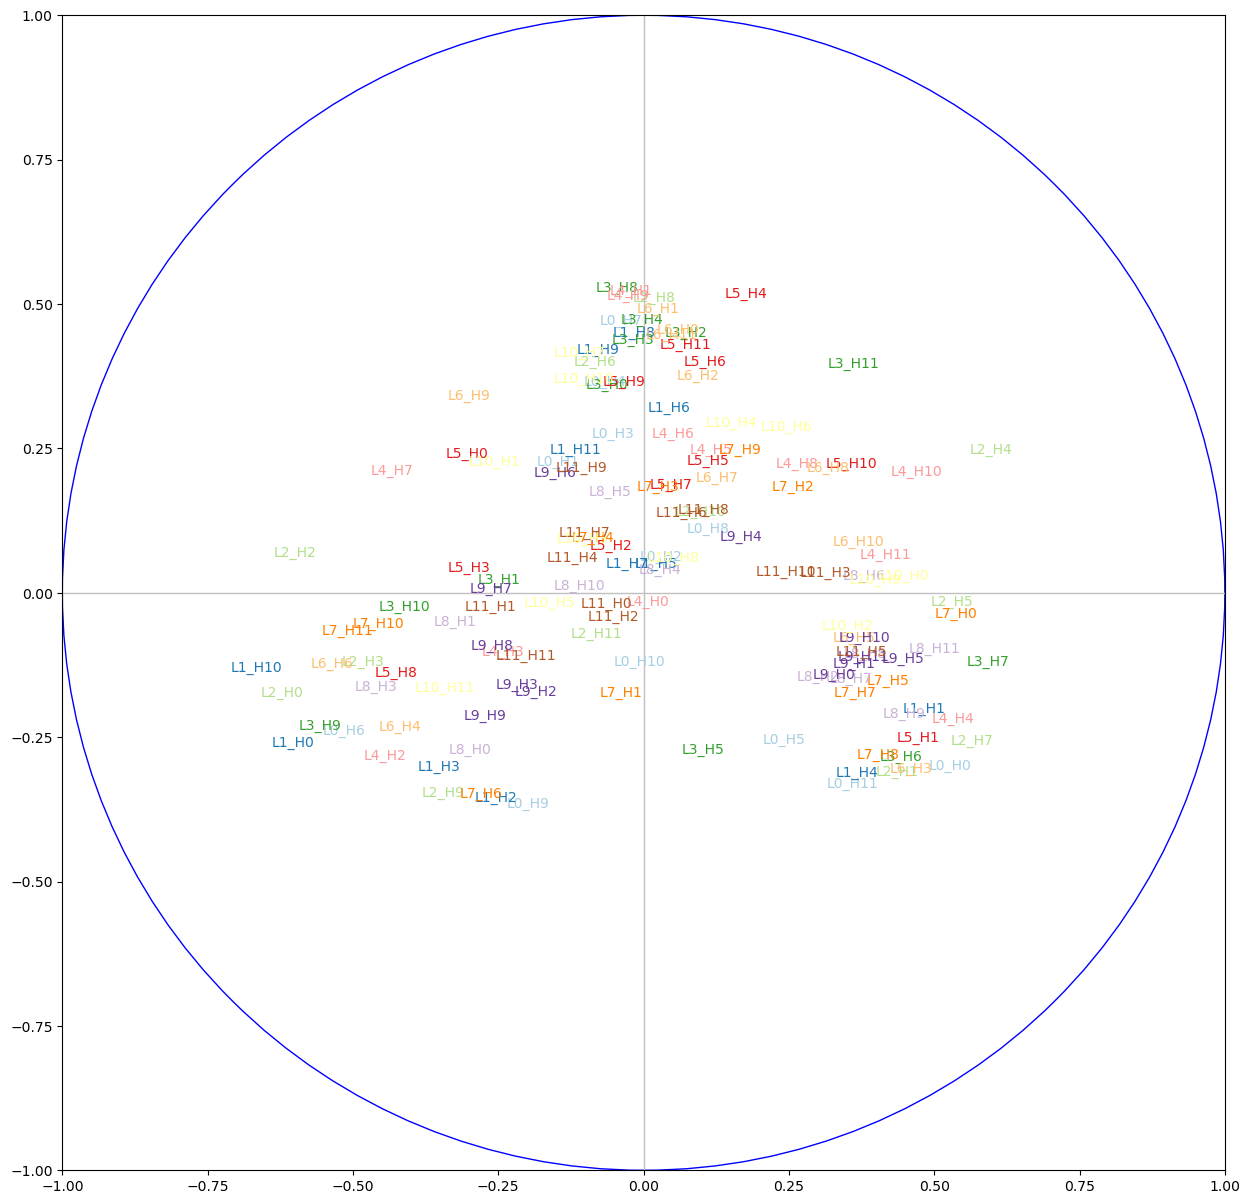

In [111]:
monACP.plot_variables(1,2)

In [113]:
monACP.pour_plot(["<no_rel>", ":ARG0", ":ARG1"],2, "./RoB_np.bin")

(63325,)
PC2 : [-9.043272 , 9.573514]
(61168,)
PC2 : [-9.043272 , 9.573514]
(122844,)
PC2 : [-9.043272 , 9.573514]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(4, 300) (4, 300)


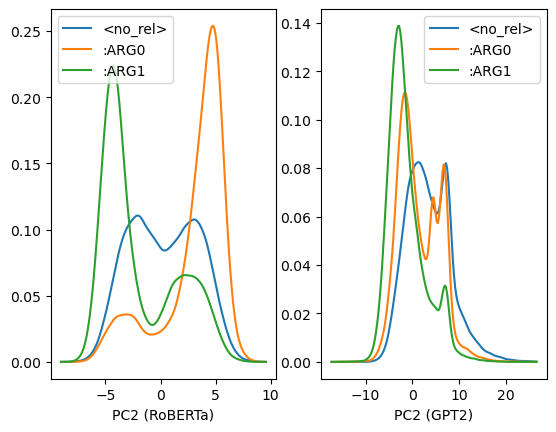

In [125]:
Y_RoB = joblib.load("./RoB_np.bin")
Y_GPT = joblib.load("./GPT_np.bin")
print(Y_RoB.shape, Y_GPT.shape)
fig, axes = plt.subplots(
            nrows=1,ncols=2
        )
axes[0].plot(Y_RoB[0], Y_RoB[1])
axes[0].plot(Y_RoB[0], Y_RoB[2])
axes[0].plot(Y_RoB[0], Y_RoB[3])
axes[0].legend(("<no_rel>", ":ARG0", ":ARG1"))
axes[0].set_xlabel("PC2 (RoBERTa)")
axes[1].plot(Y_GPT[0,:180], Y_GPT[1,:180])
axes[1].plot(Y_GPT[0,:180], Y_GPT[2,:180])
axes[1].plot(Y_GPT[0,:180], Y_GPT[3,:180])
axes[1].legend(("<no_rel>", ":ARG0", ":ARG1"))
axes[1].set_xlabel("PC2 (GPT2)")
#plt.savefig("./ACP_RoB_vs_GPT.eps")
plt.show()


(63325,)
PC2 : [-9.043272 , 9.573514]
(61168,)
PC2 : [-9.043272 , 9.573514]
(122844,)
PC2 : [-9.043272 , 9.573514]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


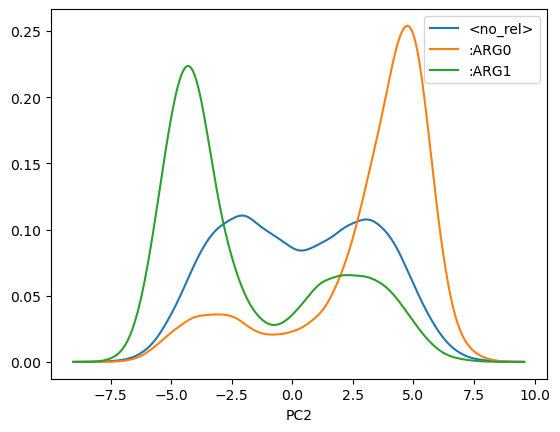

In [96]:
monACP.plot_univar(["<no_rel>", ":ARG0", ":ARG1"],2, "./RoB_norel_ARG0_ARG1_PC2.eps")

(63325,)
PC2 : [-9.043272 , 9.573514]
(61168,)
PC2 : [-9.043272 , 9.573514]
(122844,)
PC2 : [-9.043272 , 9.573514]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1914,)
PC2 : [-9.043272 , 9.573514]
(5638,)
PC2 : [-9.043272 , 9.573514]
(11051,)
PC2 : [-9.043272 , 9.573514]


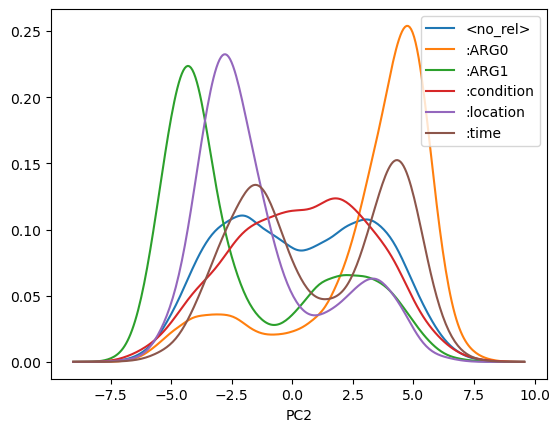

In [105]:
monACP.plot_univar(["<no_rel>", ":ARG0", ":ARG1",
                    ":condition", ":location",":time"
                    ],2, "./RoB_6rels_PC2.eps")

(122844,)
PC1 : [-16.138027 , 68.296448]
(29372,)
PC1 : [-16.138027 , 68.296448]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


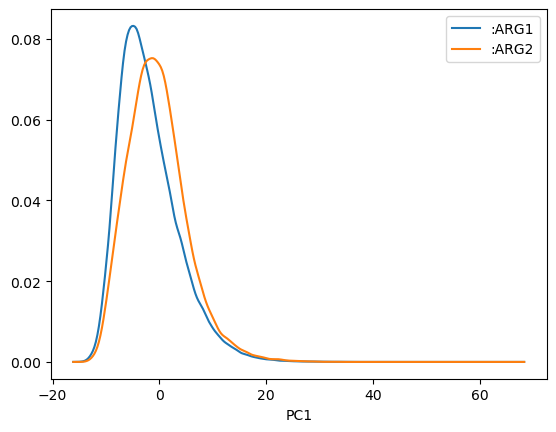

(122844,)
PC2 : [-9.043272 , 9.573514]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(29372,)
PC2 : [-9.043272 , 9.573514]


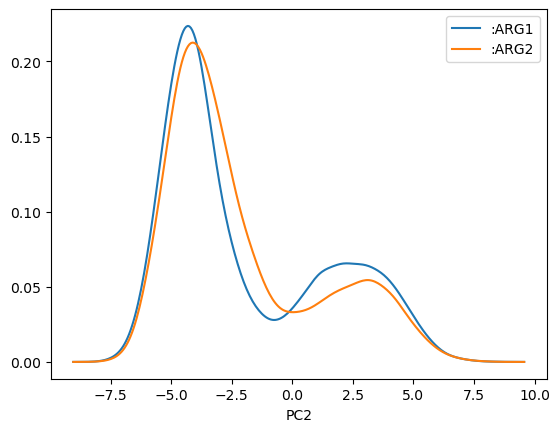

(122844,)
PC3 : [-11.584057 , 19.321295]
(29372,)
PC3 : [-11.584057 , 19.321295]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


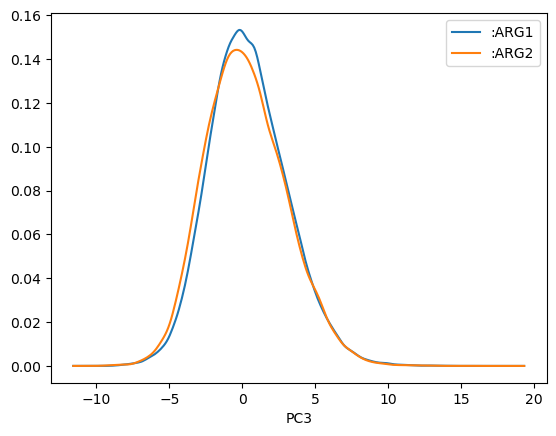

(122844,)
PC4 : [-8.030669 , 21.648035]
(29372,)
PC4 : [-8.030669 , 21.648035]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


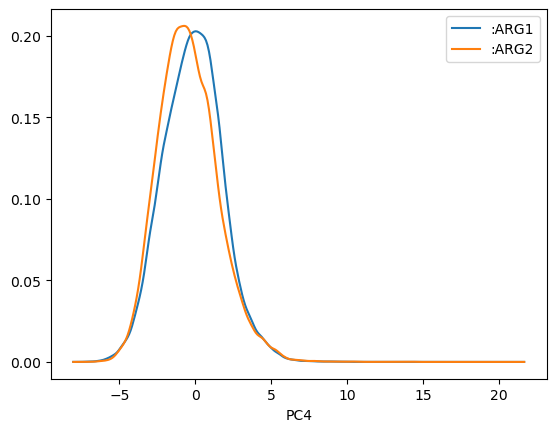

In [97]:
#monACP.plot_univar(["<no_rel>", ":ARG0", ":ARG1",
#                    ":condition", ":location",":time",
#                    ":polarity", ":mod", ":quant",
#                     ":poss", ":ARG2"
#                    ],2)

monACP.plot_univar([":ARG1", ":ARG2"],1, "./RoB_ARG1_ARG2_PC1.eps")
monACP.plot_univar([":ARG1", ":ARG2"],2, "./RoB_ARG1_ARG2_PC2.eps")
monACP.plot_univar([":ARG1", ":ARG2"],3, "./RoB_ARG1_ARG2_PC3.eps")
monACP.plot_univar([":ARG1", ":ARG2"],4, "./RoB_ARG1_ARG2_PC4.eps")

#monACP.plot_univar(["<no_rel>", ":ARG0", ":ARG1", ":ARG2"],2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1914,)
PC2 : [-9.043272 , 9.573514]
(5638,)
PC2 : [-9.043272 , 9.573514]
(11051,)
PC2 : [-9.043272 , 9.573514]


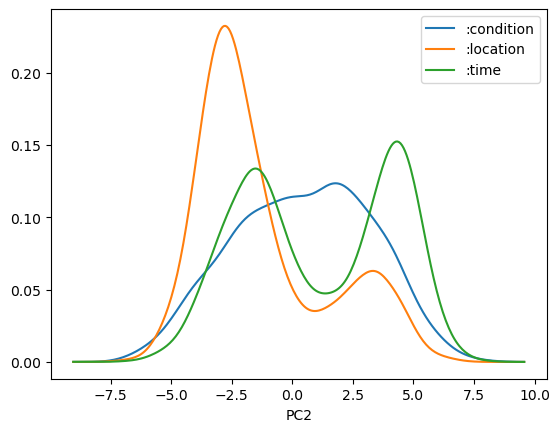

In [99]:
monACP.plot_univar([":condition", ":location",":time"],2, "./RoB_condition_location_time_PC2.eps")

(43282,)
PC1 : [-16.138027 , 68.296448]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5479,)
PC1 : [-16.138027 , 68.296448]
(4284,)
PC1 : [-16.138027 , 68.296448]


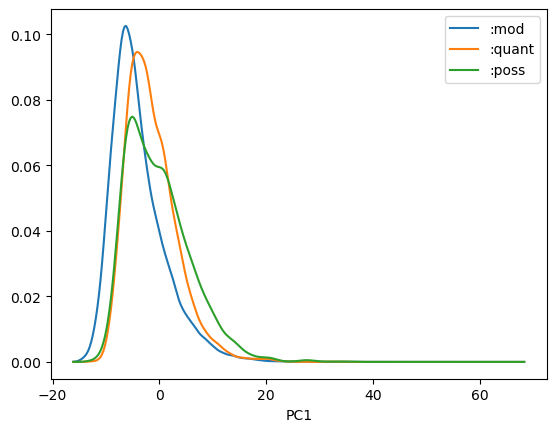

(43282,)
PC2 : [-9.043272 , 9.573514]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5479,)
PC2 : [-9.043272 , 9.573514]
(4284,)
PC2 : [-9.043272 , 9.573514]


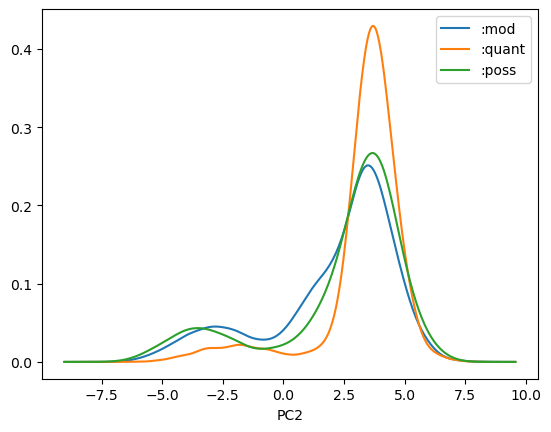

(43282,)
PC3 : [-11.584057 , 19.321295]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5479,)
PC3 : [-11.584057 , 19.321295]
(4284,)
PC3 : [-11.584057 , 19.321295]


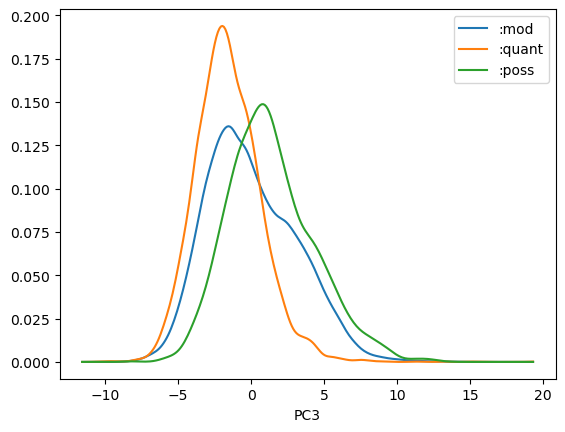

(43282,)
PC4 : [-8.030669 , 21.648035]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5479,)
PC4 : [-8.030669 , 21.648035]
(4284,)
PC4 : [-8.030669 , 21.648035]


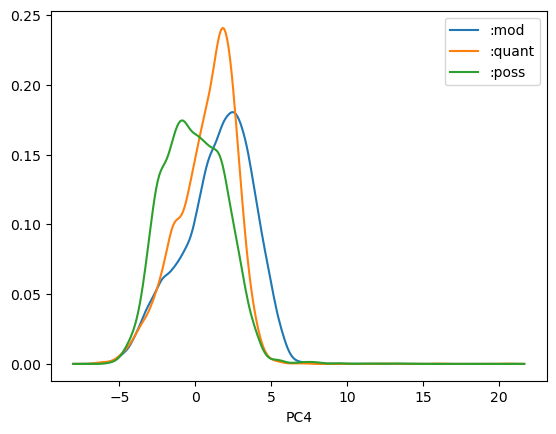

In [103]:
monACP.plot_univar([":mod", ":quant",":poss"],1, "./RoB_mod_quant_poss_PC1.eps")
monACP.plot_univar([":mod", ":quant",":poss"],2, "./RoB_mod_quant_poss_PC2.eps")
monACP.plot_univar([":mod", ":quant",":poss"],3, "./RoB_mod_quant_poss_PC3.eps")
monACP.plot_univar([":mod", ":quant",":poss"],4, "./RoB_mod_quant_poss_PC4.eps")

(10098,)
PC4 : [-8.030669 , 21.648035]
(43282,)
PC4 : [-8.030669 , 21.648035]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5479,)
PC4 : [-8.030669 , 21.648035]
(4284,)
PC4 : [-8.030669 , 21.648035]


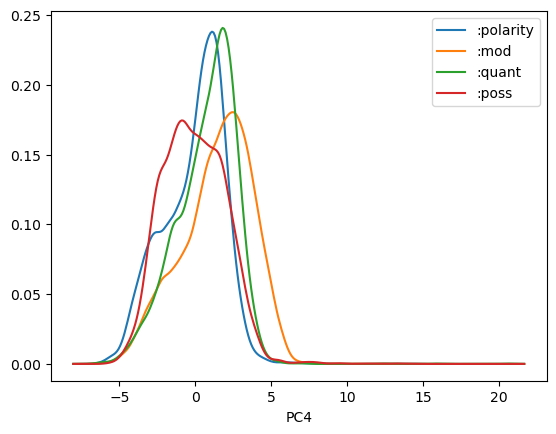

In [102]:
monACP.plot_univar([":polarity", ":mod", ":quant",":poss"],4)

(10098,)
PC1 : [-16.138027 , 68.296448]
(5479,)
PC1 : [-16.138027 , 68.296448]


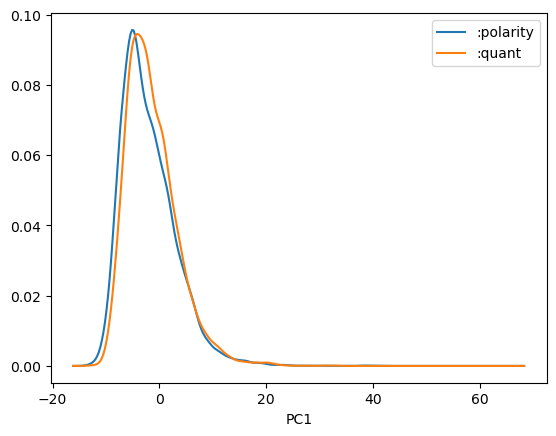

(10098,)
PC2 : [-9.043272 , 9.573514]
(5479,)
PC2 : [-9.043272 , 9.573514]


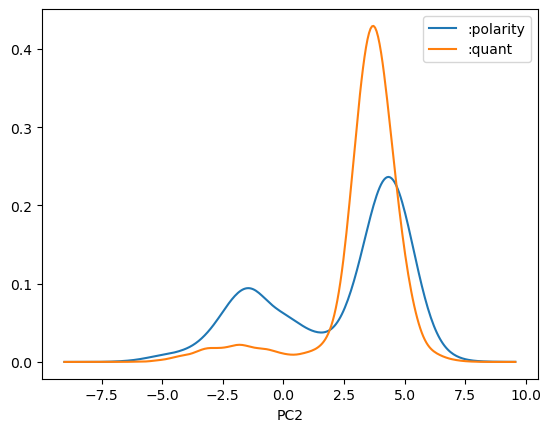

(10098,)
PC3 : [-11.584057 , 19.321295]
(5479,)
PC3 : [-11.584057 , 19.321295]


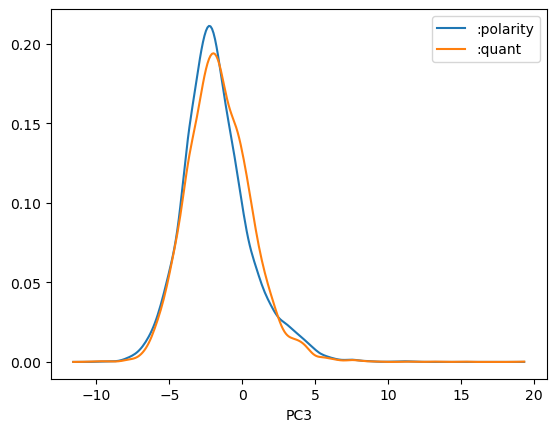

(10098,)
PC4 : [-8.030669 , 21.648035]
(5479,)
PC4 : [-8.030669 , 21.648035]


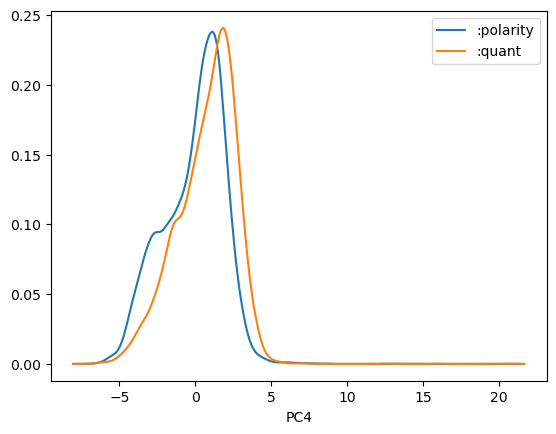

In [104]:
monACP.plot_univar([":polarity",":quant"],1)
monACP.plot_univar([":polarity",":quant"],2)
monACP.plot_univar([":polarity",":quant"],3)
monACP.plot_univar([":polarity",":quant"],4)

(63325, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(61168, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


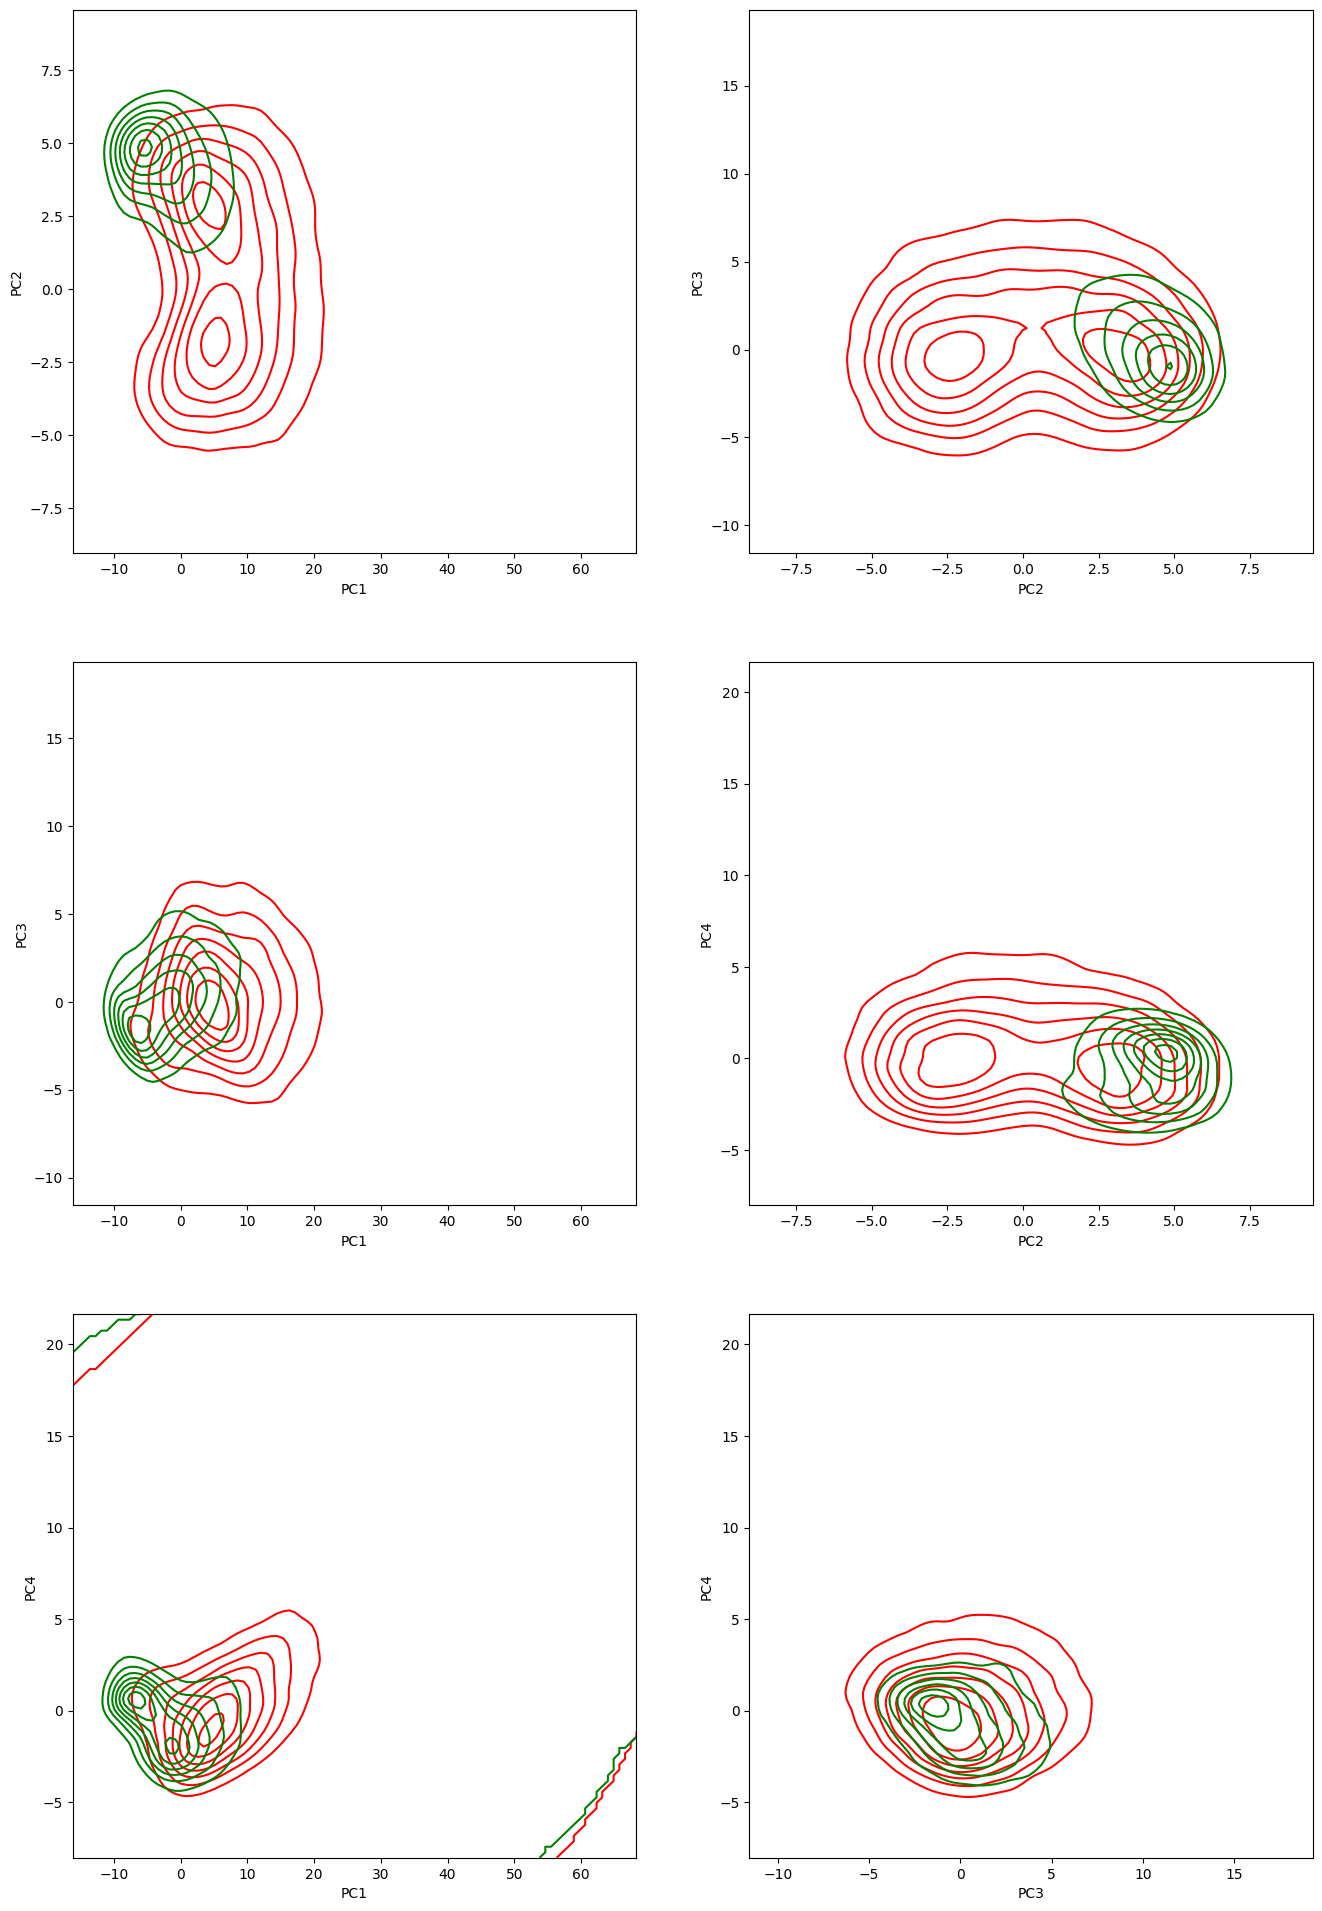

In [45]:
monACP.plot_individuals(["<no_rel>", ":ARG0"])

(61168, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(122844, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


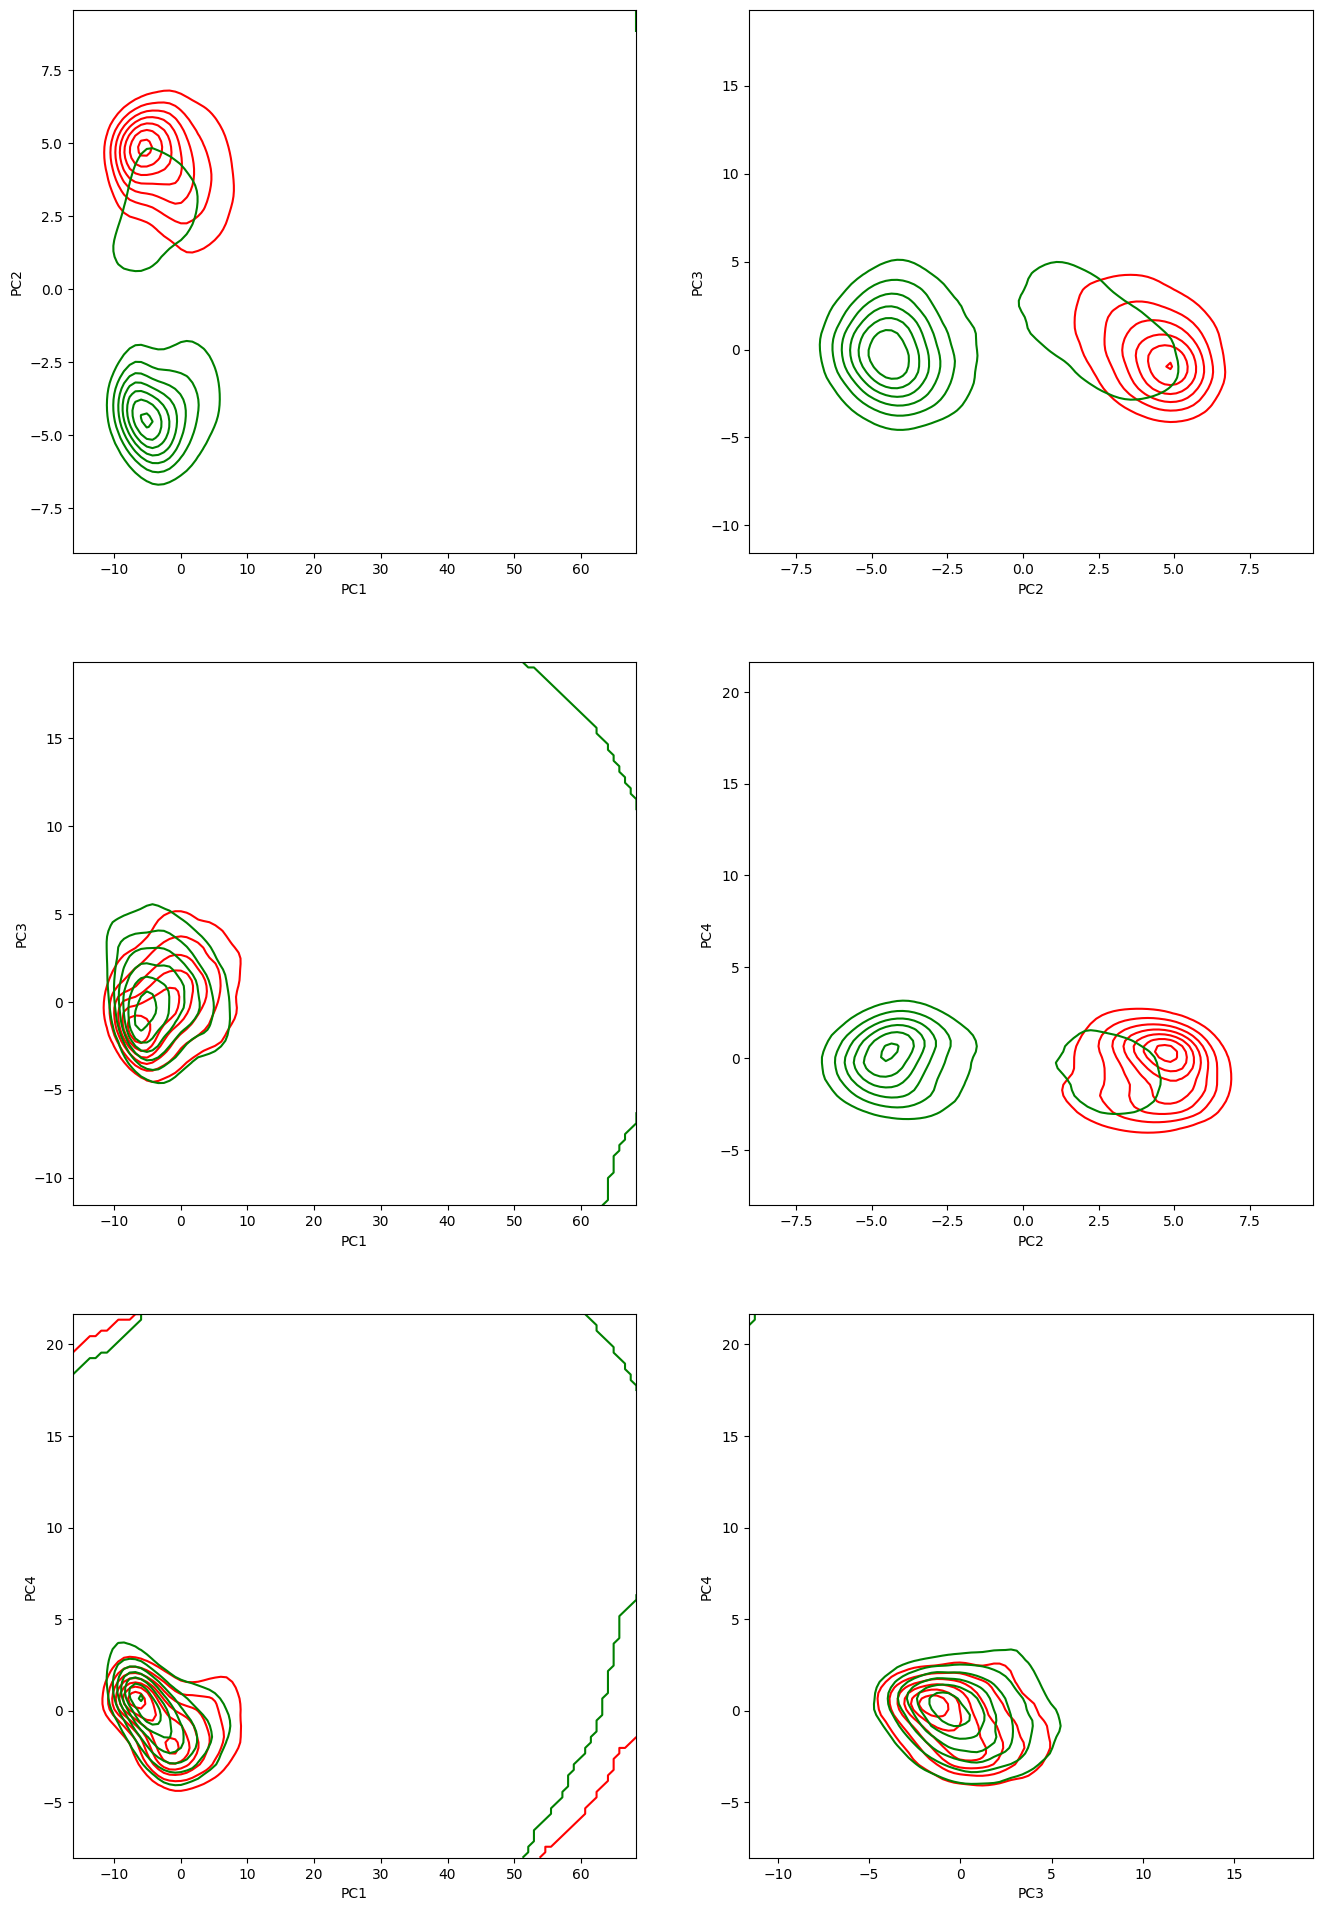

In [46]:
monACP.plot_individuals([":ARG0", ":ARG1"])

(1914, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(5638, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


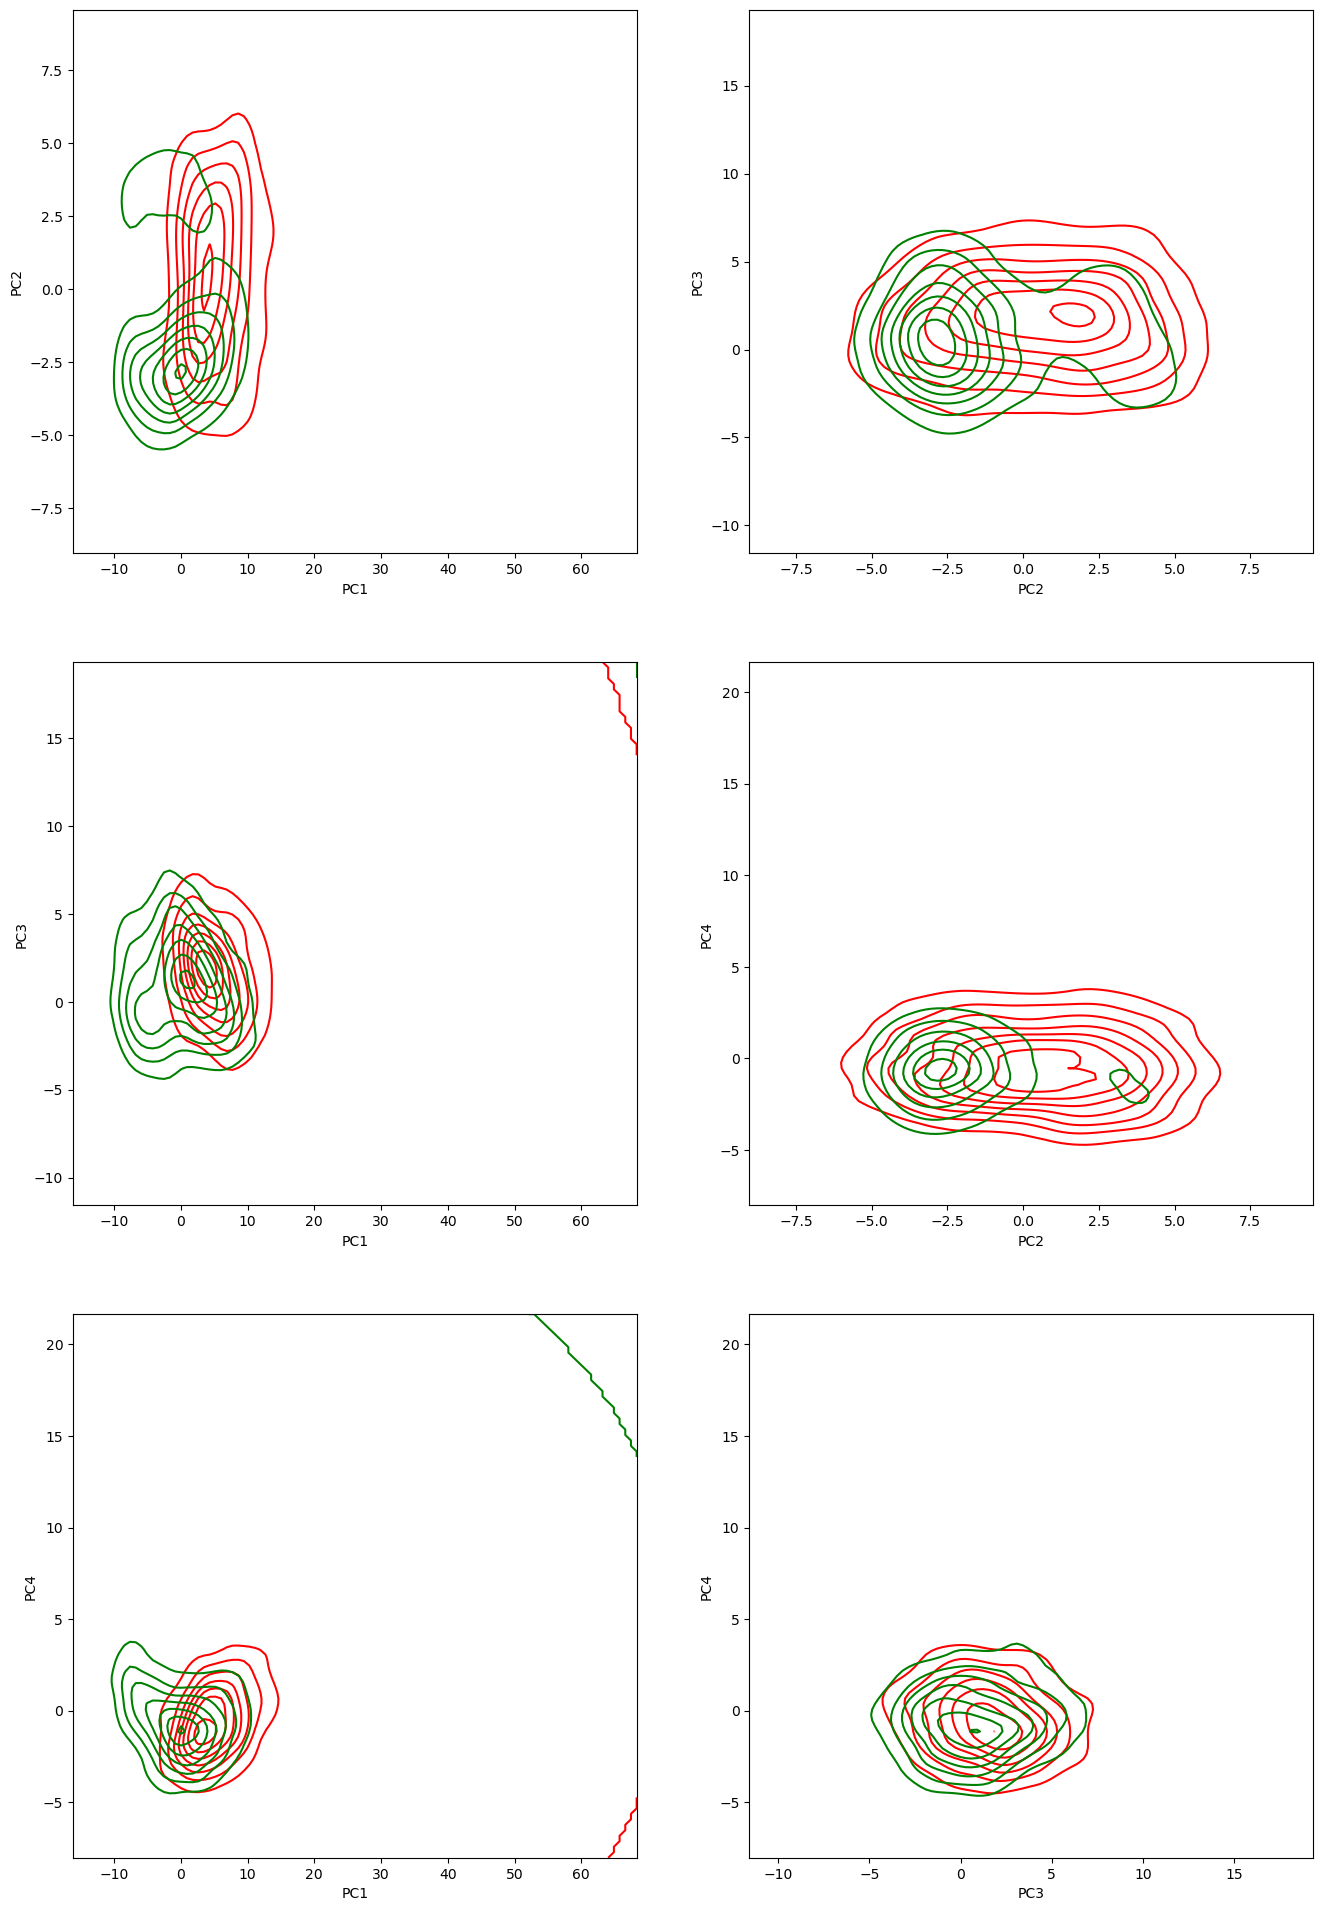

In [19]:
monACP.plot_individuals([":condition", ":location"])

(5638, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(11051, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


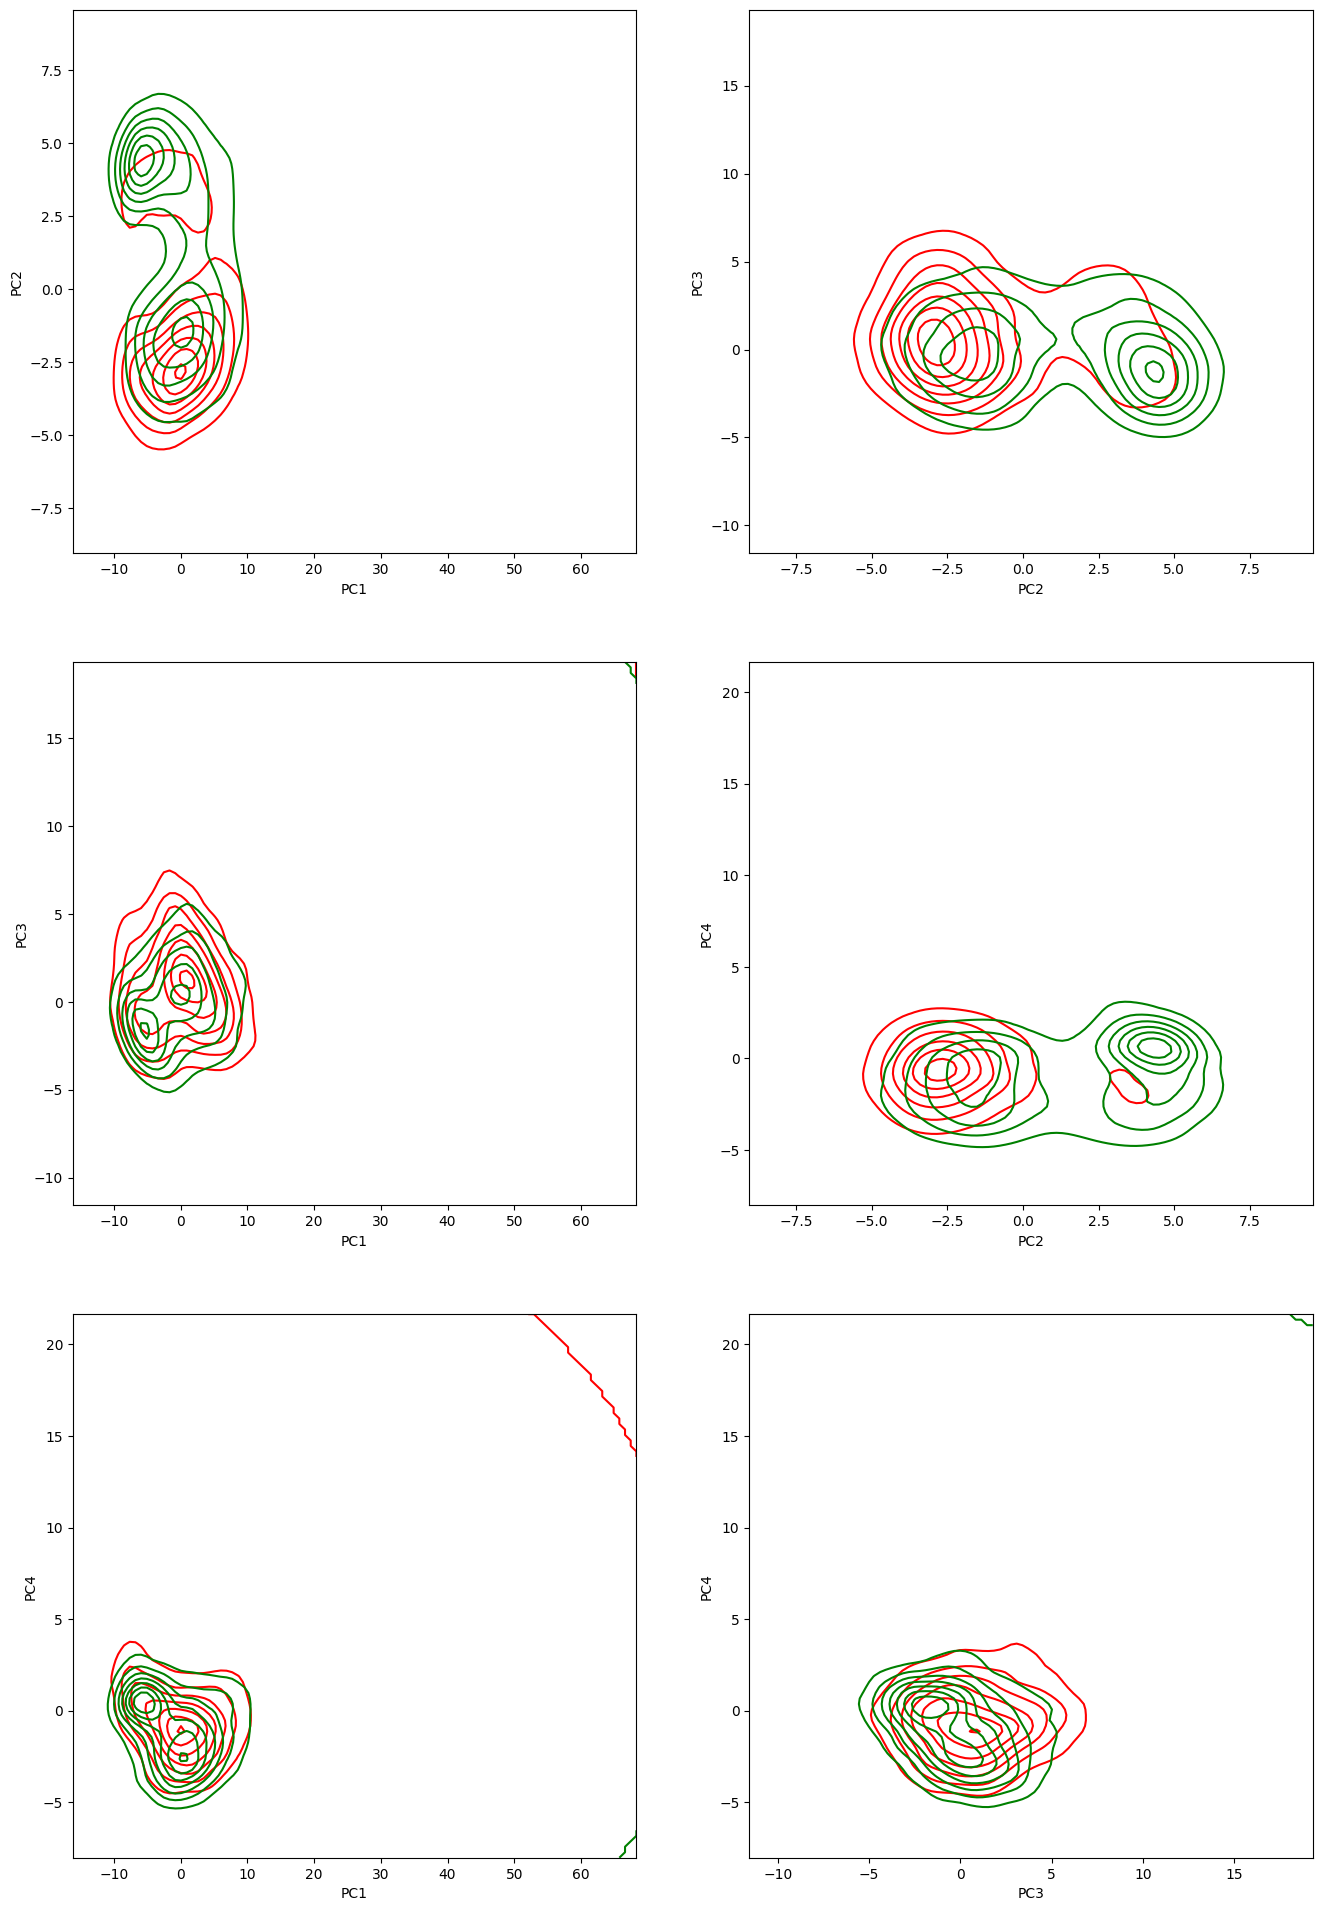

In [48]:
monACP.plot_individuals([":location",":time"])

(10098, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(43282, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


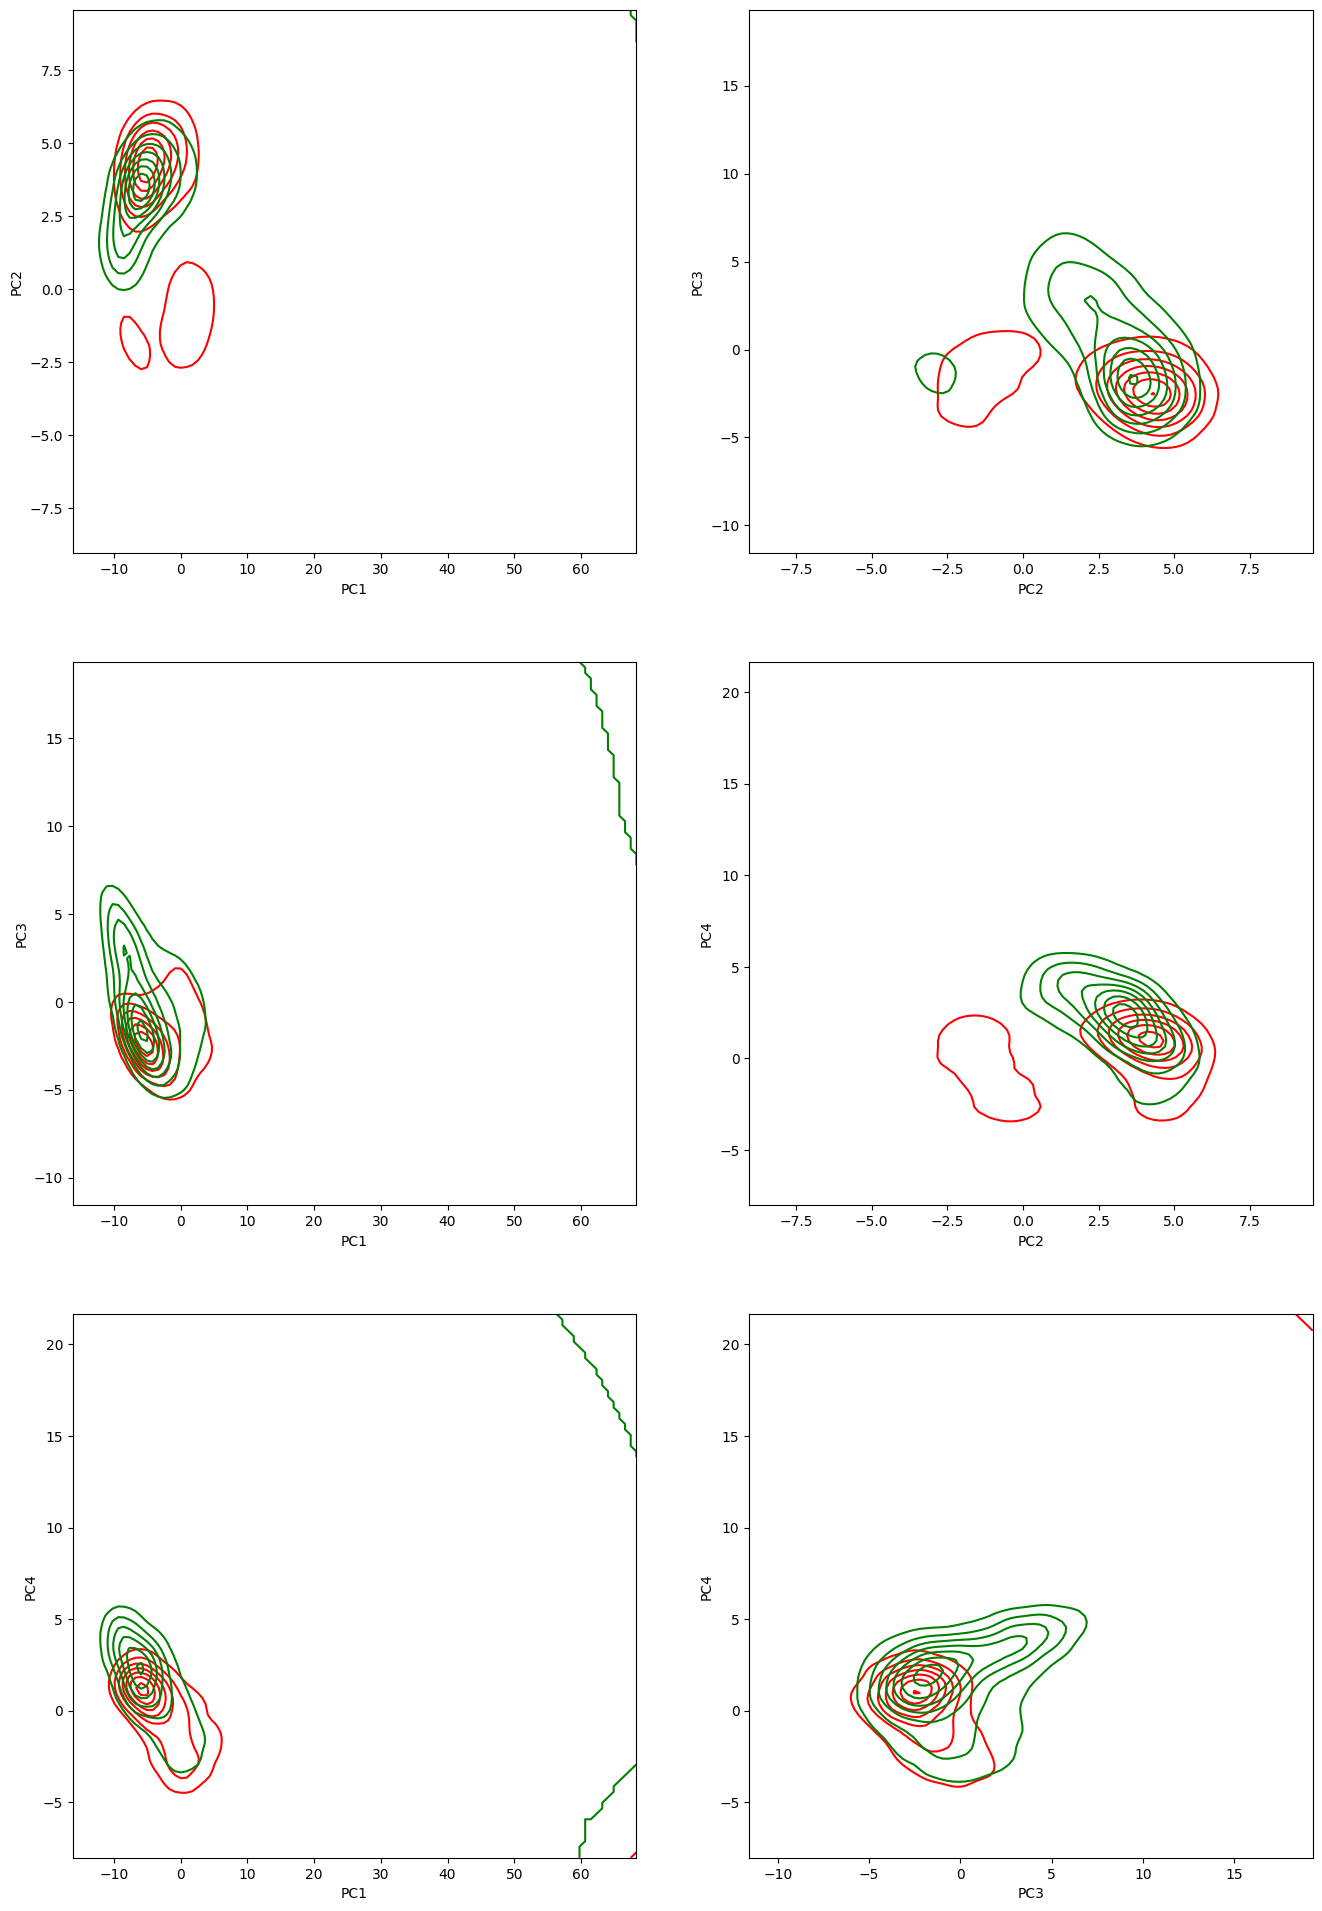

In [49]:
monACP.plot_individuals([":polarity", ":mod"])

(5479, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(5638, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


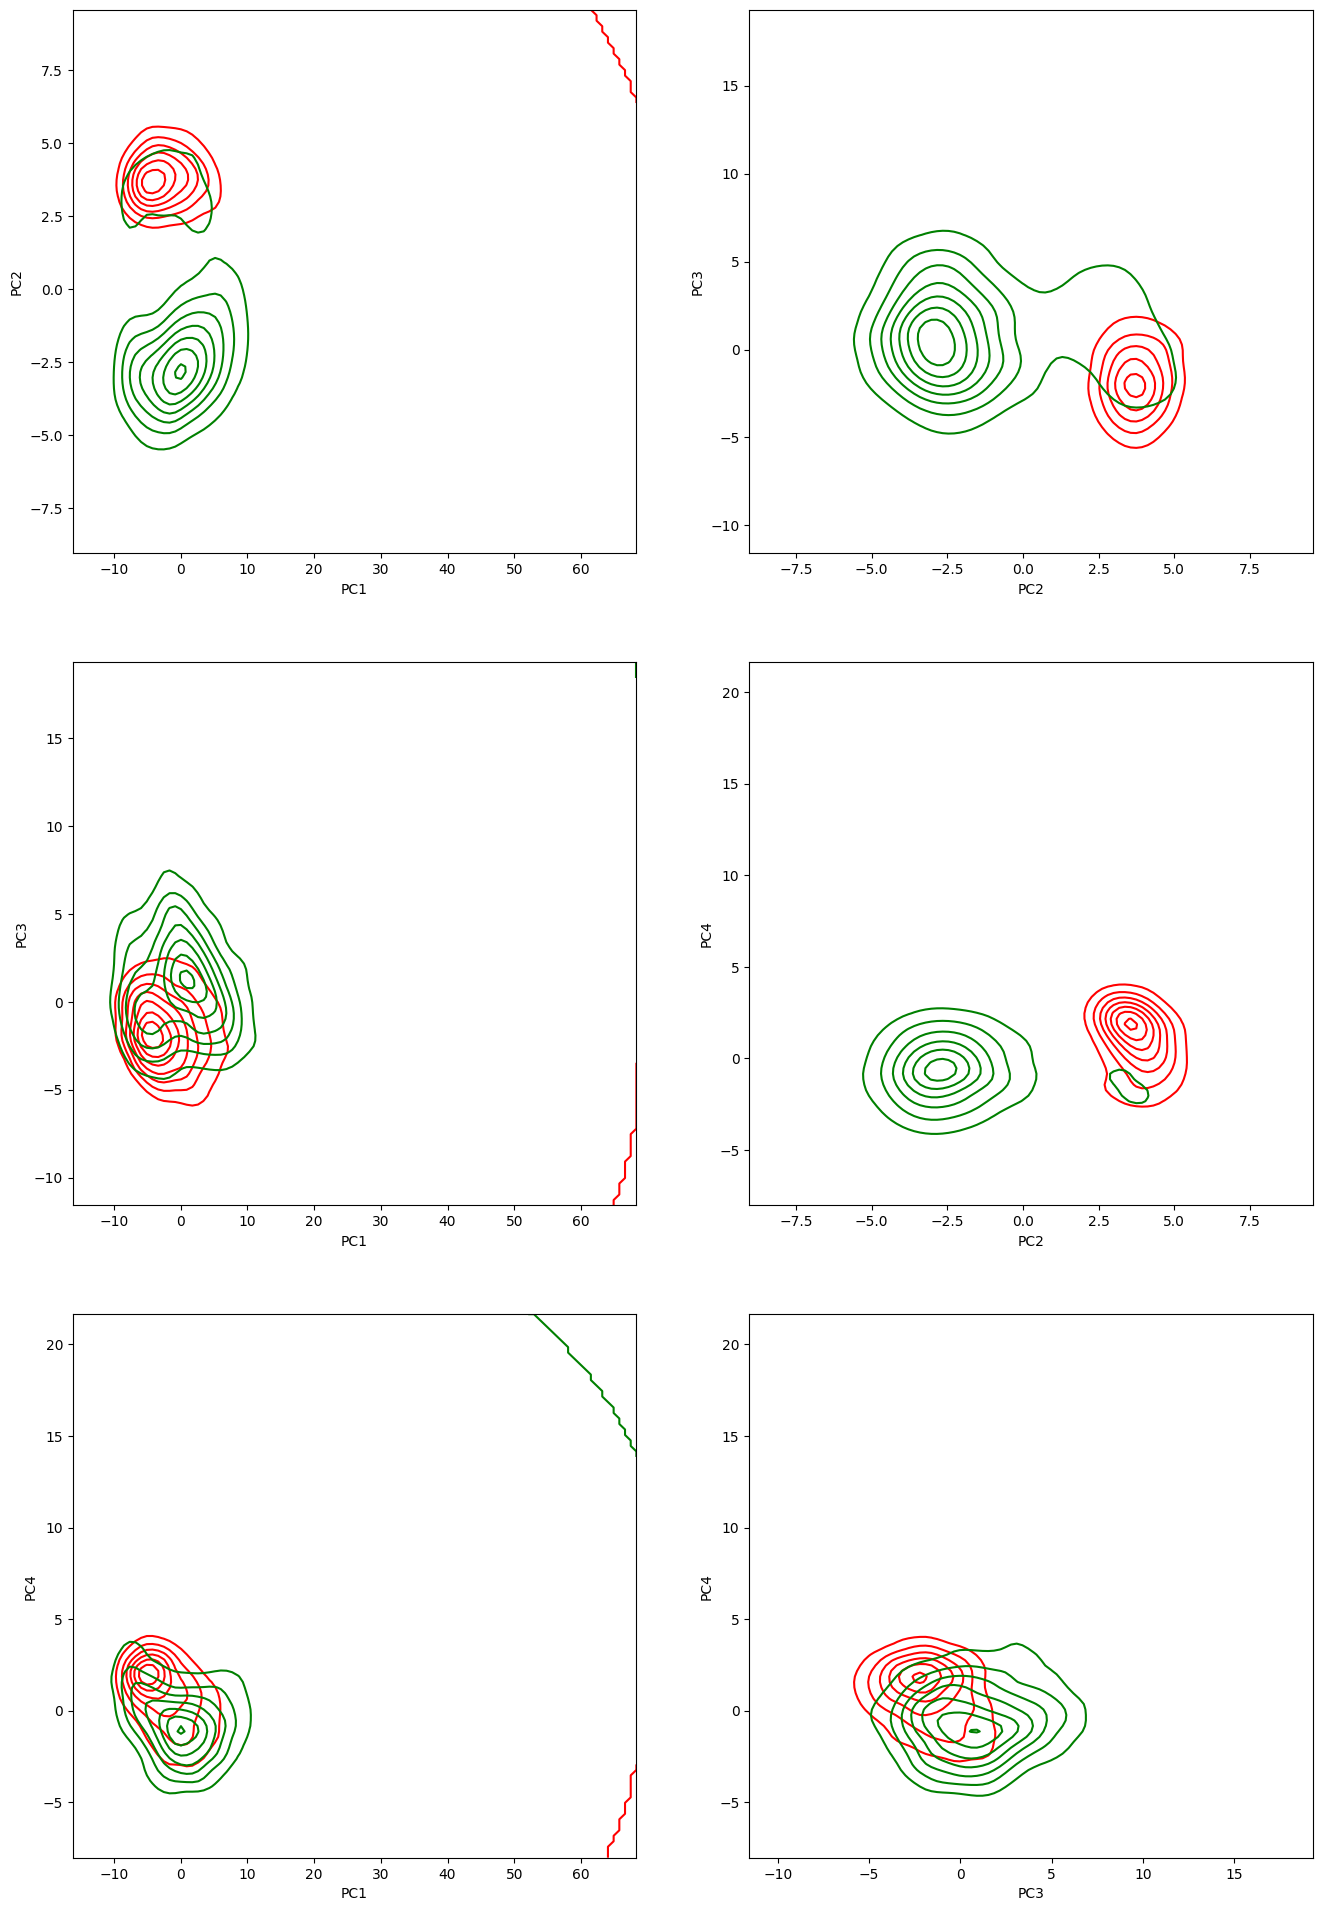

In [50]:
monACP.plot_individuals([":quant", ":location"])

(43282, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(4284, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


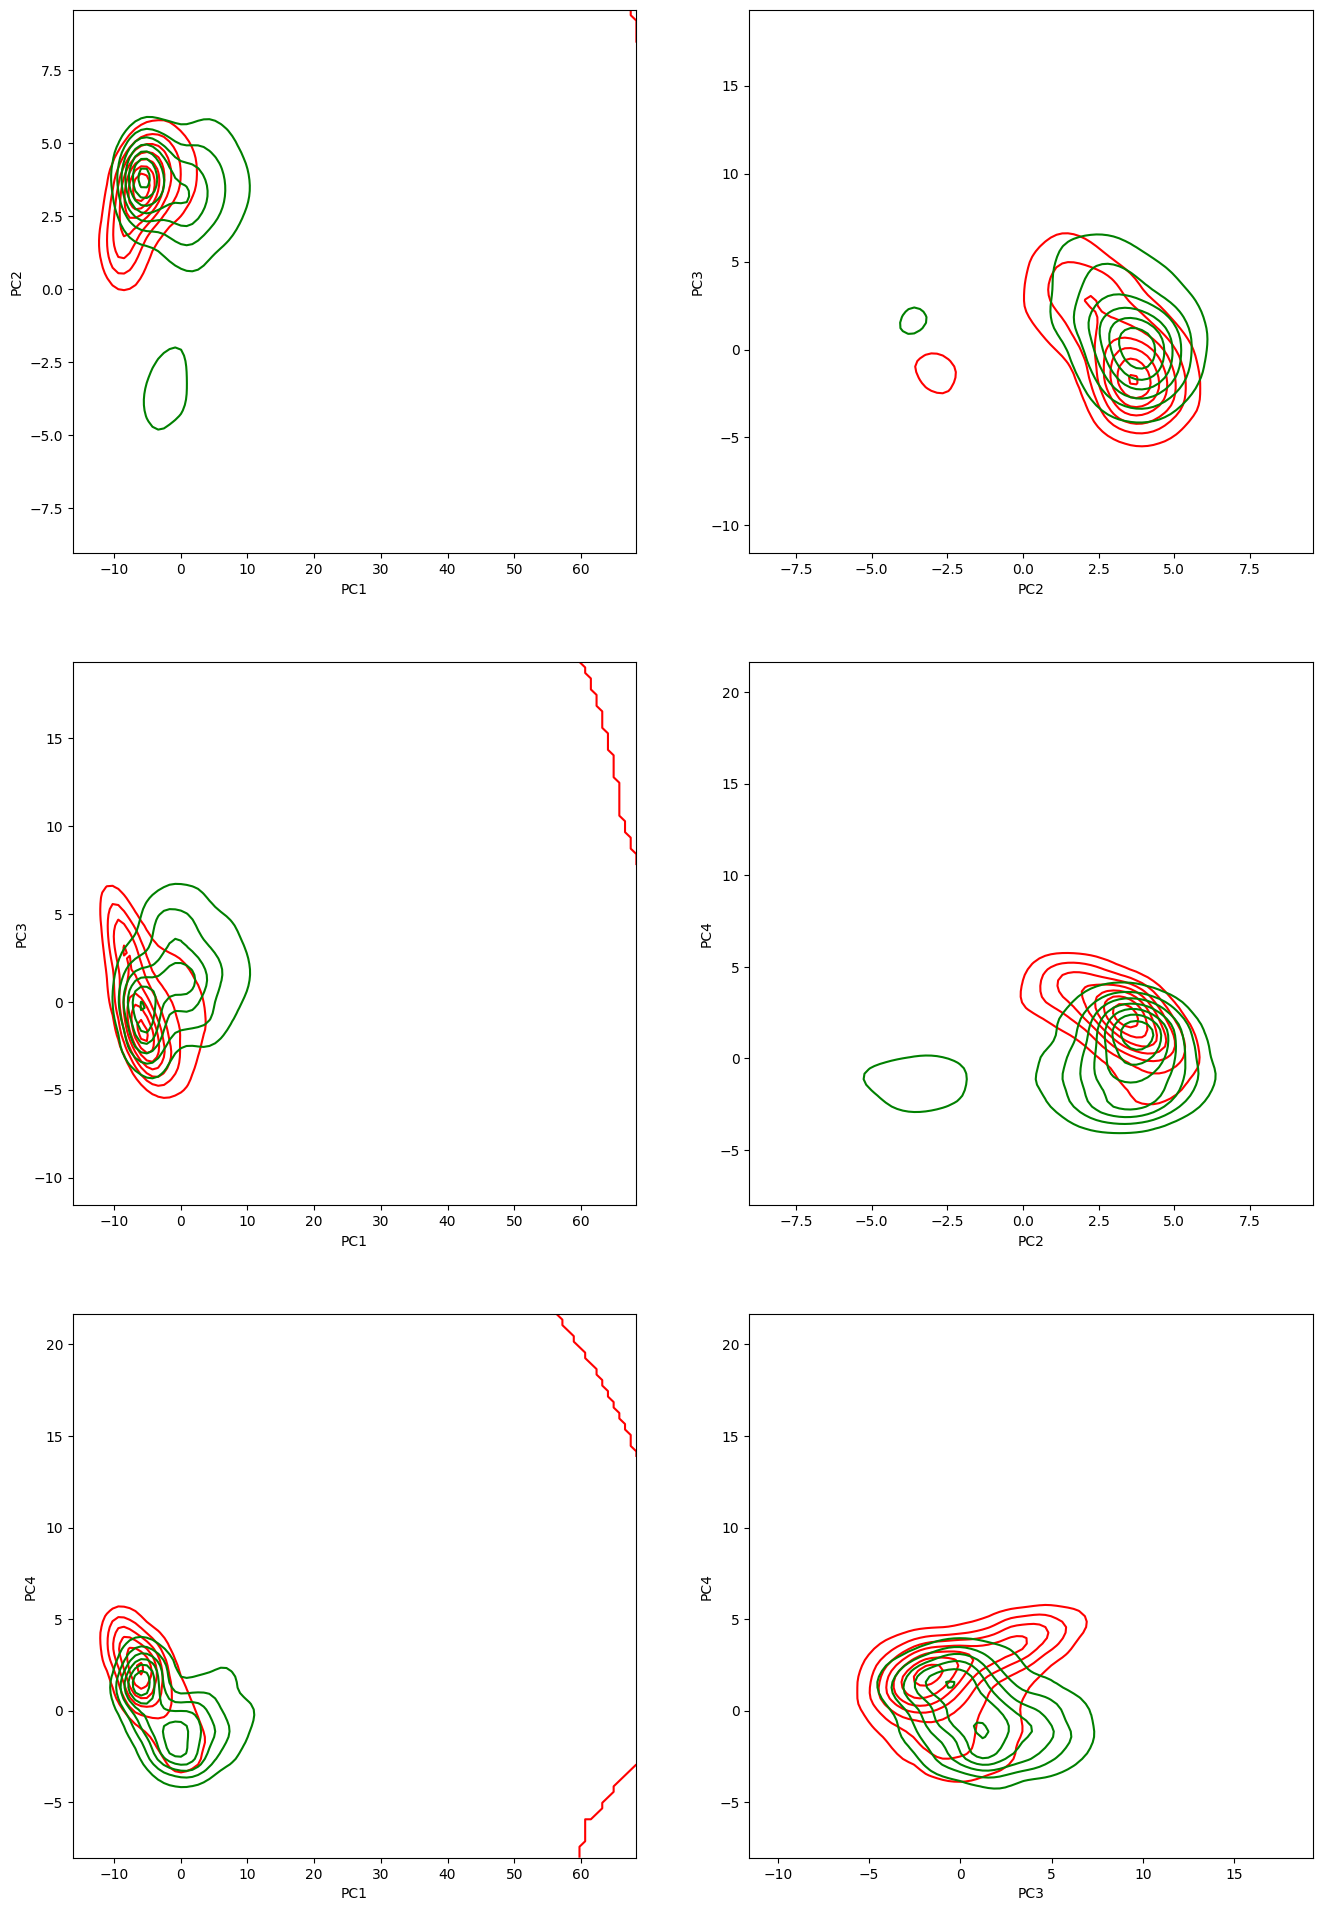

In [51]:
monACP.plot_individuals([":mod", ":poss"])

(122844, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]
(29372, 4)
PC1 : [-16.138027 , 68.296448] PC2 : [-9.043272 , 9.573514]
PC1 : [-16.138027 , 68.296448] PC3 : [-11.584057 , 19.321295]
PC1 : [-16.138027 , 68.296448] PC4 : [-8.030669 , 21.648035]
PC2 : [-9.043272 , 9.573514] PC3 : [-11.584057 , 19.321295]
PC2 : [-9.043272 , 9.573514] PC4 : [-8.030669 , 21.648035]
PC3 : [-11.584057 , 19.321295] PC4 : [-8.030669 , 21.648035]


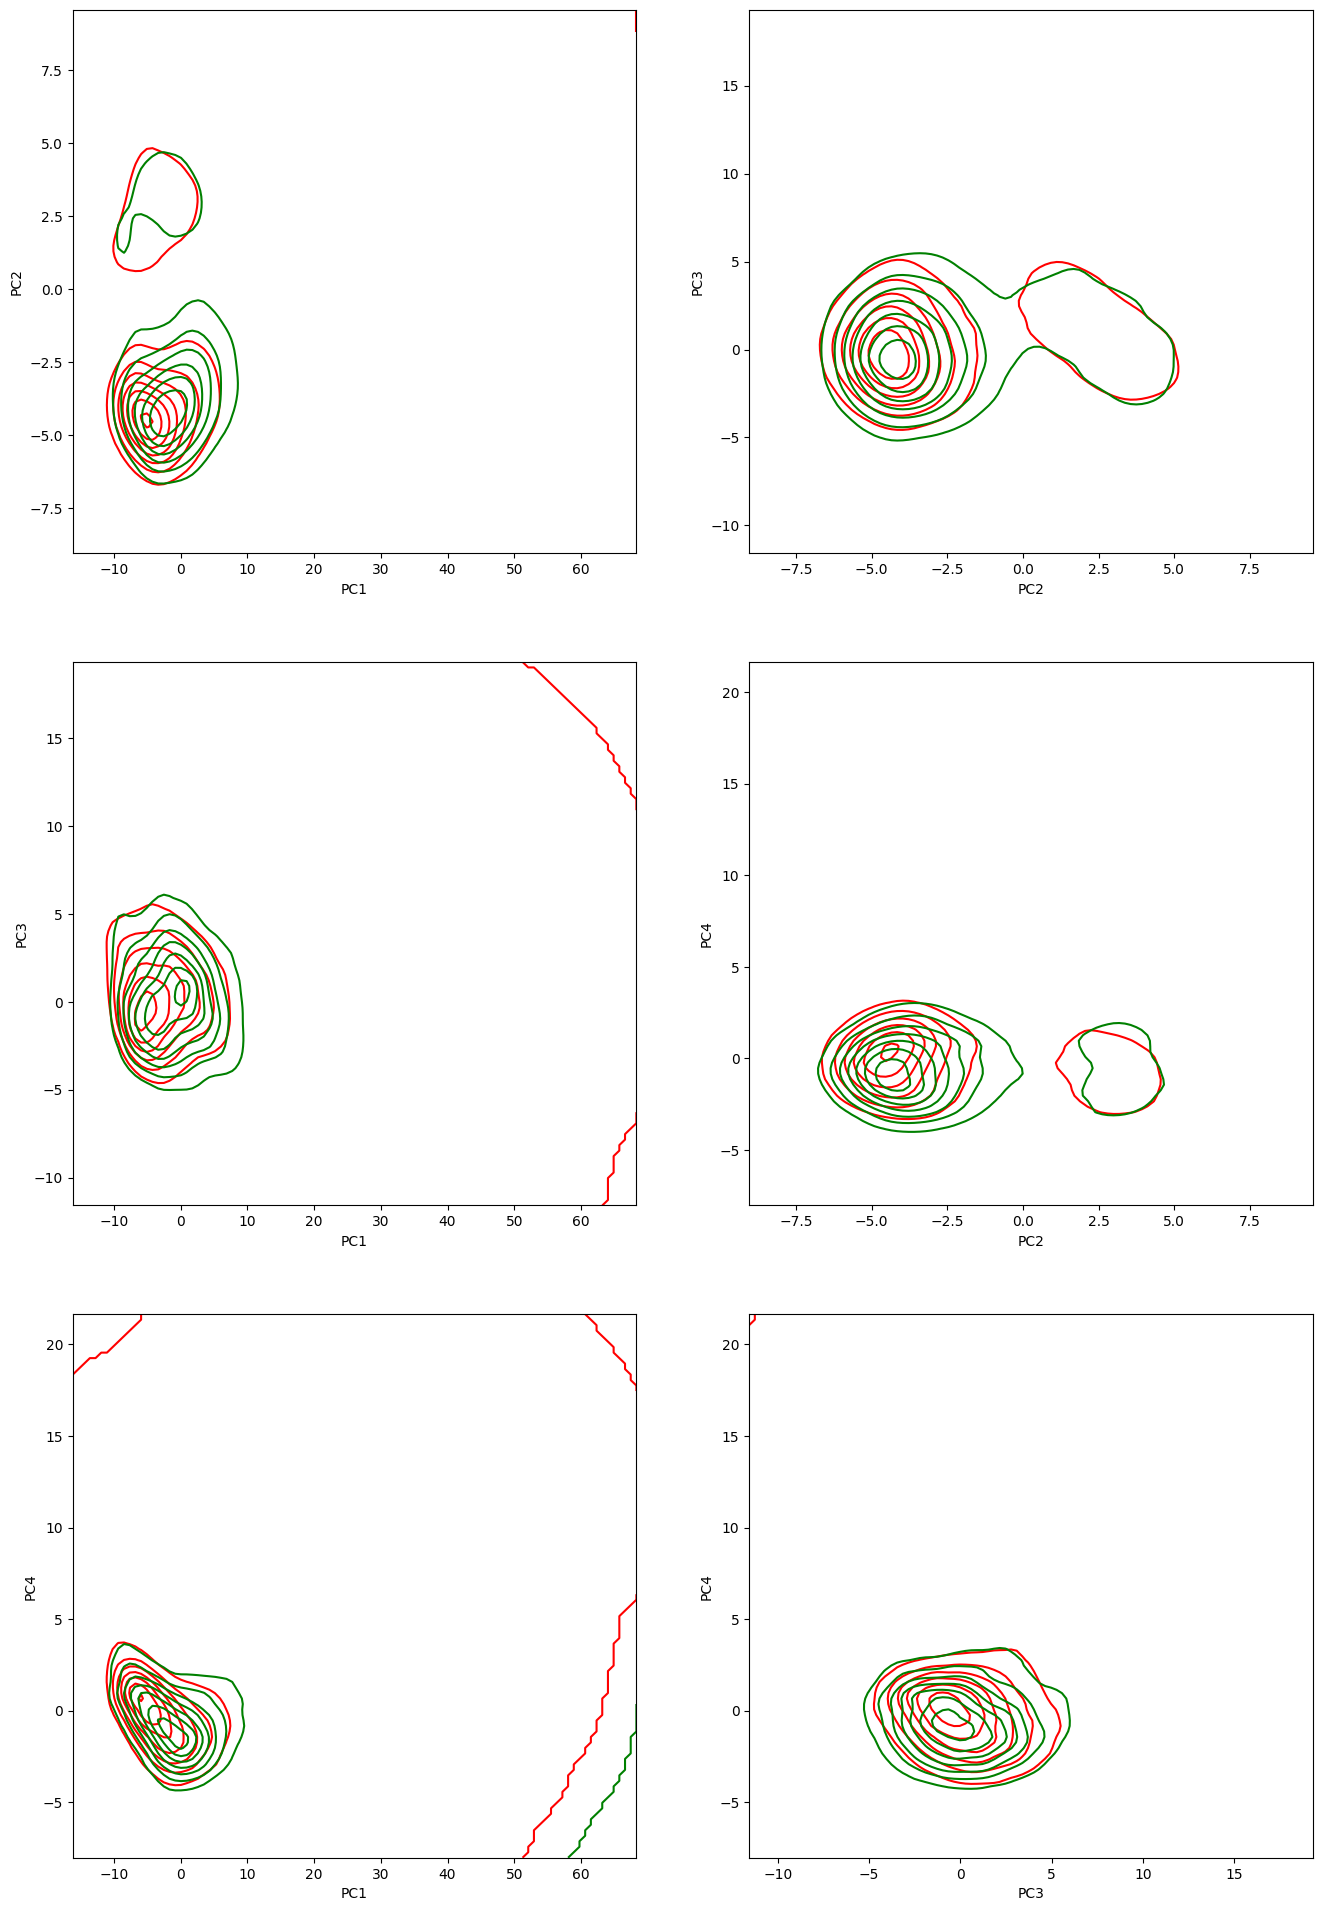

In [52]:
monACP.plot_individuals([":ARG1", ":ARG2"])